# **Import Package**

In [ ]:
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 390, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 390 (delta 89), reused 53 (delta 51), pack-reused 269
Receiving objects: 100% (390/390), 107.16 KiB | 3.83 MiB/s, done.
Resolving deltas: 100% (191/191), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.5 MB/s eta 0:00:00
***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla T4!
We will now install RAPIDS cuDF, cuML, and cuGraph via pip! 
Please stand by, should be quick...
***********************************************************************

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.5/502.5 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 GB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 8.0 MB/s eta 0:00:00


In [ ]:
import time
import json
import cudf
import pandas as pd
import numpy as np
import math
import cupy
import pandas as pd
import random
import cupy as cp
import cuml
from google.colab import drive
from cuml import ForestInference
from cuml.preprocessing import LabelEncoder, OneHotEncoder
from cuml.preprocessing import StandardScaler
from cuml.preprocessing import MinMaxScaler
from cuml.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
import seaborn as sns
import matplotlib.pyplot as plt
from cuml.linear_model import LogisticRegression
from cuml.svm import SVC
from cuml.neighbors import KNeighborsClassifier
from cuml.naive_bayes import MultinomialNB
from cuml.ensemble import RandomForestClassifier
from cuml.ensemble import RandomForestRegressor
import shap
from cuml.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from cuml.metrics import mean_squared_error
from cuml.metrics import roc_auc_score
from cuml.model_selection import train_test_split
from cudf.core.column import numerical
from sklearn.model_selection import KFold
from cuml.metrics import accuracy_score
import torch.nn.functional as F
import torch
import torch.utils.data as data
import torch.nn as nn
from sklearn.model_selection import GridSearchCV
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import DataLoader, TensorDataset
import xgboost as xgb
import lightgbm as lgb
import re
from tqdm.notebook import tqdm  # Use notebook version of tqdm for cleaner output in Jupyter/Colab

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


# **Load Data**

In [ ]:
data = cudf.read_csv('/content/drive/My Drive/datashare/GKX_20201231.csv')

In [ ]:
data

,permno,DATE,mvel1,RET,prc,SHROUT,beta,betasq,chmom,dolvol,...,baspread,ill,maxret,retvol,std_dolvol,std_turn,zerotrade,sic2,bm,bm_ia
0,10006,19260130,6.540000e+04,0.032732,110.250000,600,<NA>,<NA>,<NA>,<NA>,...,0.006857,<NA>,<NA>,<NA>,<NA>,<NA>,6.5625e-05,<NA>,<NA>,<NA>
1,10022,19260130,1.120000e+04,0.017857,57.000000,200,<NA>,<NA>,<NA>,<NA>,...,0.018018,<NA>,<NA>,<NA>,<NA>,<NA>,2.5735294e-06,<NA>,<NA>,<NA>
2,10030,19260130,2.340000e+04,0.161667,174.250000,156,<NA>,<NA>,<NA>,<NA>,...,0.004158,<NA>,<NA>,<NA>,<NA>,<NA>,2.275e-05,<NA>,<NA>,<NA>
3,10049,19260130,1.850000e+04,0.141892,83.500000,250,<NA>,<NA>,<NA>,<NA>,...,0.006780,<NA>,<NA>,<NA>,<NA>,<NA>,2.1875e-05,<NA>,<NA>,<NA>
4,10057,19260130,6.125000e+03,-0.035714,11.812500,500,<NA>,<NA>,<NA>,<NA>,...,0.071795,<NA>,<NA>,<NA>,<NA>,<NA>,9.9431818e-06,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4345503,93423,20201231,2.611343e+06,0.109665,34.099998,84977,1.921340268,3.691548425,0.798194265,16.06057479,...,0.060029,4.462048e-10,0.176470578,0.050187057,0.519032887,17.64909253,3.8037093e-09,79.0,<NA>,<NA>
4345504,93426,20201231,3.671460e+05,0.076239,31.480000,12552,1.301939638,1.695046822,0.551928881,12.33418981,...,0.035050,2.2964622e-08,0.159100175,0.043004496,0.473367176,2.144263547,3.2367295e-08,36.0,<NA>,<NA>
4345505,93427,20201231,2.523235e+06,0.135851,77.589996,36938,0.847168981,0.717695283,0.011311145,14.56857982,...,0.029388,1.3642739e-09,0.04822715,0.020205613,0.294511707,1.469369498,2.2270102e-08,36.0,<NA>,<NA>
4345506,93434,20201231,8.738802e+04,0.122605,2.930000,33482,0.389812218,0.151953565,0.282874051,9.453982766,...,0.051558,3.4352725e-07,0.116666652,0.035276986,0.935967157,0.897074507,1.0376704e-07,1.0,<NA>,<NA>


In [ ]:
Macro_data = cudf.read_csv('/content/drive/My Drive/datashare/MacroeconomicPredictors.csv')

In [ ]:
Macro_data

,Unnamed: 0,yyyymm,dp,ep,b/m,ntis,tbl,dfy,tms,svar
0,0,187101,-2.837728,-2.406945,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,1,187102,-2.851151,-2.420368,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,2,187103,-2.875302,-2.444519,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,3,187104,-2.903111,-2.472328,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,4,187105,-2.928112,-2.497329,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...
1615,1615,200508,-4.048545,-2.924826,0.335731186,0.004657571,0.0344,0.0087,-0.0011,0.000696723
1616,1616,200509,-4.046912,-2.915547,0.332964319,0.006060138,0.0342,0.009,-0.068,0.000659901
1617,1617,200510,-4.017515,-2.880963,0.337066705,0.005056898,0.0371,0.0095,-0.0567,0.001817986
1618,1618,200511,-4.040729,-2.899134,0.325656333,0.006150583,0.0388,0.0097,-0.0312,0.000539899


In [ ]:
stock_data = data.copy()


stock_data = stock_data.dropna()


stock_data['DATE'] = cudf.to_datetime(stock_data['DATE'], format='%Y%m%d')


cleaned_df = stock_data.set_index('DATE')


In [ ]:
cleaned_df

,permno,mvel1,RET,prc,SHROUT,beta,betasq,chmom,dolvol,idiovol,...,baspread,ill,maxret,retvol,std_dolvol,std_turn,zerotrade,sic2,bm,bm_ia
DATE,,,,,,,,,,,,,,,,,,,,,
1985-01-31,21290,1.380275e+06,0.077626,29.500000,50421,1.098659,1.207052,0.090524,13.150607,0.037638,...,0.029042,9.120652e-09,0.036364,0.021786,0.682479,1.951065,4.952669e-08,33.0,0.558115,-0.384234
1985-01-31,25582,1.091022e+06,0.188940,32.250000,40222,1.386242,1.921666,0.459892,13.380239,0.046012,...,0.027045,1.080976e-08,0.042056,0.020227,0.496864,0.842553,6.344829e-08,38.0,0.585250,0.107832
1985-01-31,27705,1.311118e+05,0.153061,14.125000,10711,1.754764,3.079196,-0.578620,11.092552,0.078732,...,0.050909,1.210093e-07,0.092105,0.038279,0.616161,1.958914,3.609665e-08,36.0,0.531739,0.024715
1985-01-31,38447,5.687850e+04,0.031905,10.750000,5417,1.603478,2.571143,-0.133013,9.233055,0.057820,...,0.029086,4.226283e-07,0.061728,0.026198,0.811875,0.906200,8.246129e-08,59.0,0.947316,0.374346
1985-01-31,44134,2.643060e+05,0.220238,25.625000,12586,1.284910,1.650993,0.134888,10.764984,0.042641,...,0.020830,6.917992e-08,0.031447,0.015929,0.753015,0.906291,8.448533e-08,35.0,0.535299,-0.010284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-28,93246,3.435735e+06,0.258568,69.410004,62298,1.252919,1.569806,-0.167451,14.952681,0.027777,...,0.020289,4.995228e-10,0.048887,0.016731,0.367123,2.190472,1.661045e-08,36.0,0.195994,-0.315029
2019-06-28,93289,1.494687e+06,0.107227,23.440001,70604,1.788396,3.198361,-0.073971,14.587230,0.053170,...,0.034032,2.166623e-09,0.042680,0.024930,0.471430,3.075335,1.536516e-08,36.0,0.219000,-0.292023
2019-06-28,93372,8.456945e+05,0.079852,39.790001,22795,1.075019,1.155666,0.191248,13.438667,0.040028,...,0.024115,3.425975e-09,0.026232,0.016172,0.424681,2.290243,1.888013e-08,35.0,0.346567,-0.045264


In [ ]:
# Get the data types of each column
data_types = cleaned_df.dtypes

# Filter columns that are not float
non_float_columns = data_types[data_types != 'float64'].index.tolist()

# Check the contents of non_float_columns
if set(non_float_columns) == {'permno'}:
    print("All the data is float64.")
else:
    # Remove 'permno' from the list, if it's present
    non_float_columns = [col for col in non_float_columns if col != 'permno']
    print("Columns that are not float64:", non_float_columns)

Columns that are not float64: ['SHROUT']


In [ ]:
# Splitting data for training, validation, and testing
train_data = cleaned_df.loc['1985-01-31':'1994-12-31']
validation_data = cleaned_df.loc['1995-01-31':'2001-12-31']
test_data = cleaned_df.loc['2002-01-31':'2018-12-31']

# Features and target variable
X_columns = [col for col in cleaned_df.columns if col not in ["permno", "RET"]]

# Training data
X_train = train_data[X_columns]
y_train = train_data["RET"]

# Validation data
X_validation = validation_data[X_columns]
y_validation = validation_data["RET"]

# Test data
X_test = test_data[X_columns]
y_test = test_data["RET"]

# Group by 'permno' and compute the mean of 'mvel1' for each stock
mean_mvel1 = test_data.groupby('permno')['mvel1'].mean()

# Sort stocks by average 'mvel1' value
sorted_permnos = mean_mvel1.sort_values(ascending=False)

# Get the permno values for the top and bottom 1000 stocks
top_1000_permnos = sorted_permnos.head(1000).index
bottom_1000_permnos = sorted_permnos.tail(1000).index

# Filter the original test data to create datasets for the top and bottom stocks
X_test_top = test_data[test_data['permno'].isin(top_1000_permnos)][X_columns]
y_test_top = test_data[test_data['permno'].isin(top_1000_permnos)]['RET']

X_test_bottom = test_data[test_data['permno'].isin(bottom_1000_permnos)][X_columns]
y_test_bottom = test_data[test_data['permno'].isin(bottom_1000_permnos)]['RET']


In [ ]:
def format_time(elapsed_time):
    """Helper function to format elapsed time."""
    m, s = divmod(elapsed_time, 60)
    h, m = divmod(m, 60)
    return f"{int(h):02}:{int(m):02}:{int(s):02}"

In [ ]:
start_year = 1985
train_years = 10
validation_years = 7
test_years = 17  # Start with a 30-year test set

splits = []

# Loop until the test years become 1
while test_years >= 1:

    # Define the year ranges for train, validation, and test sets
    train_start = f"{start_year}-01-31"
    train_end = f"{start_year + train_years - 1}-12-31"

    validation_start = f"{start_year + train_years}-01-01"
    validation_end = f"{start_year + train_years + validation_years - 1}-12-31"

    test_start = f"{start_year + train_years + validation_years}-01-01"
    test_end = f"{start_year + train_years + validation_years + test_years - 1}-12-31"

    # Extract the data for each range
    train_df = cleaned_df.loc[train_start:train_end]
    validation_df = cleaned_df.loc[validation_start:validation_end]
    test_df = cleaned_df.loc[test_start:test_end]


    temp={'training':train_df,'validation':validation_df,'testing':test_df}
    # Append to the list of splits
    splits.append(temp)

    # Increase the training years by 1 and decrease the testing years by 1
    train_years += 1
    test_years -= 1

In [ ]:
def R2_score(y_pred_cudf,y_true_cudf):
  y_pred_cudf = y_pred_cudf.astype('float64')
  y_true_cudf = y_true_cudf.astype('float64')

  # Calculate the residuals
  residuals = y_true_cudf - y_pred_cudf

  # Calculate the residual sum of squares (SS_res)
  SS_res = (residuals**2).sum()

  # Calculate the total sum of squares (SS_tot)
  mean_y_true = y_true_cudf.mean()
  SS_tot = ((y_true_cudf - mean_y_true)**2).sum()

  # Compute R^2
  R2 = 1 - (SS_res / SS_tot)
  return R2

In [ ]:
def process_list(input_list):

    if all(abs(num) >= 1 for num in input_list):
        return [random.uniform(0, 1) for _ in input_list]

    result = [abs(num) for num in input_list if abs(num) < 1]

    return result


In [ ]:
def process_number(input_number):

    if abs(input_number) >= 1:
        return random.uniform(0, 1)


    return abs(input_number)

## **XGBoost**

In [ ]:
# Train the model with initial parameters on GPU
start_time = time.time()

model_XGBoost = xgb.XGBRegressor(tree_method = "hist", device = "cuda")
model_XGBoost.fit(X_train, y_train)

# Calculate and print the elapsed time
elapsed_time = time.time() - start_time
print(f"Time taken to train GradientBoostingRegressor: {format_time(elapsed_time)}")


Time taken to train GradientBoostingRegressor: 00:00:00


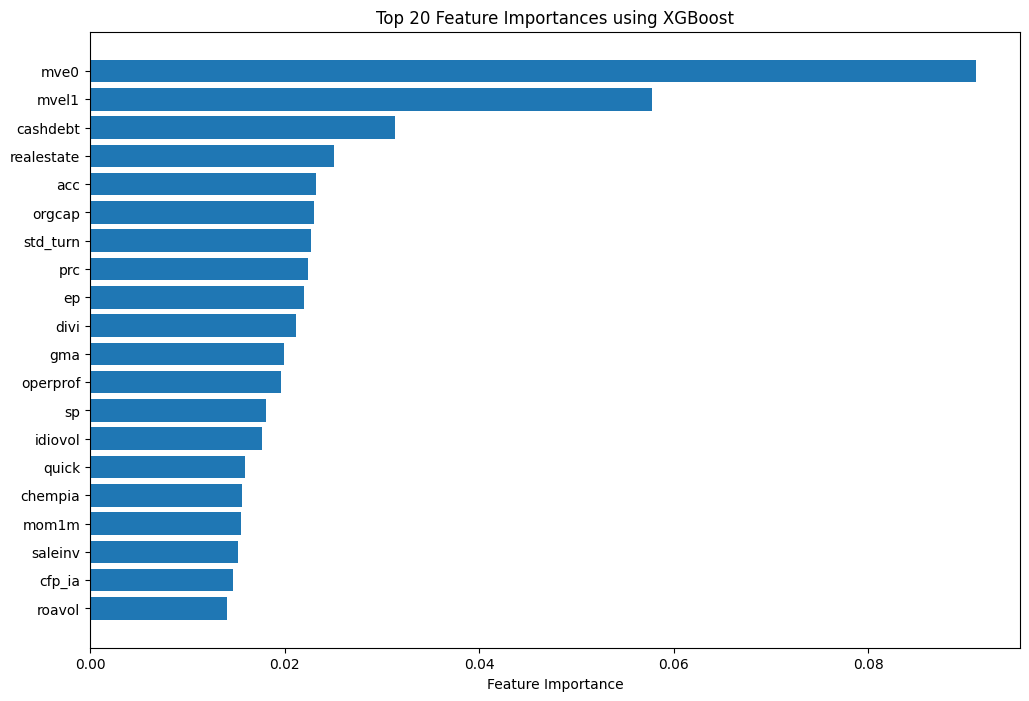

In [ ]:
# Plot feature importances
feature_importances_XGBoost = model_XGBoost.feature_importances_
sorted_idx_XGBoost = np.argsort(feature_importances_XGBoost)[::-1]  # descending order
top_20_idx_XGBoost = sorted_idx_XGBoost[:20]

plt.figure(figsize=(12, 8))
plt.title("Top 20 Feature Importances using XGBoost")
plt.barh(range(20), feature_importances_XGBoost[top_20_idx_XGBoost], align="center")
plt.yticks(range(20), [X_train.columns[i] for i in top_20_idx_XGBoost])
plt.gca().invert_yaxis()  # highest importances at the top
plt.xlabel("Feature Importance")
plt.show()

In [ ]:
# Hyperparameter tuning with GridSearchCV
param_grid_xgb = {
    'n_estimators': [150],
    'max_depth': [3],
    'learning_rate': [0.1],
    'subsample': [1.0],
    'colsample_bytree': [1.0],
    'gamma': [0.5]
}
"""
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5, None],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.25, 0.5, 1.0],
    'tree_method': ['gpu_hist'],
    'gpu_id': [0]
}
"""

xgboost_model = xgb.XGBRegressor(tree_method = "hist", device = "cuda")

grid_search_xgb = GridSearchCV(xgboost_model, param_grid_xgb, cv=5, scoring='r2', verbose=1, n_jobs=-1, error_score='raise')
X_validation_np = X_validation.to_pandas().values
y_validation_np = y_validation.to_pandas().values
# Fit the model using validation data
grid_search_xgb.fit(X_validation_np, y_validation_np)

# Predict using the best model
best_xgb = grid_search_xgb.best_estimator_


Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [ ]:
y_pred_xgb = best_xgb.predict(X_test)

y_test_np = y_test.to_pandas().values

r2_xgb = r2_score(y_test_np, y_pred_xgb)

best_params = grid_search_xgb.best_params_
print(f"Best parameters found for XGBoost: {best_params}")
print(f"Out-of-sample R^2 for XGBoost: {r2_xgb:.4f}")

Best parameters found for XGBoost: {'colsample_bytree': 1.0, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150, 'subsample': 1.0}
Out-of-sample R^2 for XGBoost: 0.5607


In [ ]:
R2_xgb_all=[]
R2_xgb_top=[]
R2_xgb_bottom=[]
for i in range(len(splits)):
  train_data_split=splits[i]['training']
  validation_data_split=splits[i]['validation']
  test_data_split=splits[i]['testing']


  # Training data
  X_train_split = train_data[X_columns]
  y_train_split = train_data["RET"]

  # Validation data
  X_validation_split = validation_data[X_columns]
  y_validation_split = validation_data["RET"]

  # Test data
  X_test_split = test_data_split[X_columns]
  y_test_split = test_data_split["RET"]



  # Group by 'permno' and compute the mean of 'mvel1' for each stock
  mean_mvel1 = test_data_split.groupby('permno')['mvel1'].mean()

  # Sort stocks by average 'mvel1' value
  sorted_permnos = mean_mvel1.sort_values(ascending=False)

  # Get the permno values for the top and bottom 1000 stocks
  top_1000_permnos = sorted_permnos.head(1000).index
  bottom_1000_permnos = sorted_permnos.tail(1000).index

  # Filter the original test data to create datasets for the top and bottom stocks
  X_test_top = test_data_split[test_data_split['permno'].isin(top_1000_permnos)][X_columns]
  y_test_top = test_data_split[test_data_split['permno'].isin(top_1000_permnos)]['RET']

  X_test_bottom = test_data_split[test_data_split['permno'].isin(bottom_1000_permnos)][X_columns]
  y_test_bottom = test_data_split[test_data_split['permno'].isin(bottom_1000_permnos)]['RET']

  best_xgb = xgb.XGBRegressor(tree_method="hist", device="cuda", **best_params)
  best_xgb.fit(X_train_split, y_train_split)


  y_pred_xgb_split = best_xgb.predict(X_test_split)
  y_test_split_np = y_test_split.to_pandas().values
  r2_temp = r2_score(y_test_split_np, y_pred_xgb_split)
  R2_xgb_all.append(r2_temp)

  y_pred_xgb_top_split = best_xgb.predict(X_test_top)
  y_test_top_split_np = y_test_top.to_pandas().values
  r2_temp_top = r2_score(y_test_top_split_np, y_pred_xgb_top_split)
  R2_xgb_top.append(r2_temp_top)

  y_pred_xgb_bottom_split = best_xgb.predict(X_test_bottom)
  y_test_bottom_split_np = y_test_bottom.to_pandas().values
  r2_temp_bottom = r2_score(y_test_bottom_split_np, y_pred_xgb_bottom_split)
  R2_xgb_bottom.append(r2_temp_bottom)





## **Random Forest**

In [ ]:

start_time = time.time()

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=10, max_depth=10,min_samples_split=10,min_samples_leaf=2)
# Train the model

X_train_float32 = X_train.astype('float32')
y_train_float32 = y_train.astype('float32')

rf_model.fit(X_train_float32 , y_train_float32)
# Calculate and print the elapsed time
elapsed_time = time.time() - start_time
print(f"Time taken to train Random Forest Regressor: {format_time(elapsed_time)}")



Time taken to train Random Forest Regressor: 00:00:00


In [ ]:
# Validate the model
validation_predictions = rf_model.predict(X_validation)
validation_rmse = mean_squared_error(y_validation, validation_predictions, squared=False)
print(f"Validation RMSE: {validation_rmse}")

Validation RMSE: 0.17401746288724781


In [ ]:
# Convert to float32
X_train_float32 = X_train.astype('float32')
y_train_float32 = y_train.astype('float32')

# Parameters to search
n_estimators_options = [10, 50, 100, 200]
max_depth_options = [50, 5, 10, 20]
min_samples_split_options = [2, 5, 10]
min_samples_leaf_options = [1, 2, 4]

best_rmse = float('inf')
best_params = None

for n_estimators in n_estimators_options:
    for max_depth in max_depth_options:
        for min_samples_split in min_samples_split_options:
            for min_samples_leaf in min_samples_leaf_options:

                # Initialize and train the RF model with the current parameters
                rf_model = RandomForestRegressor(
                    n_estimators=n_estimators,
                    max_depth=max_depth,
                    min_samples_split=min_samples_split,
                    min_samples_leaf=min_samples_leaf
                )
                rf_model.fit(X_train_float32, y_train_float32)

                # Predict on validation set
                validation_predictions = rf_model.predict(X_validation)

                # Calculate RMSE
                current_rmse = mean_squared_error(y_validation, validation_predictions, squared=False)

                # Check if this RMSE is the best so far
                if current_rmse < best_rmse:
                    best_rmse = current_rmse
                    best_params = {
                        'n_estimators': n_estimators,
                        'max_depth': max_depth,
                        'min_samples_split': min_samples_split,
                        'min_samples_leaf': min_samples_leaf
                    }

print(f"Best RMSE: {best_rmse}")
print(f"Best parameters: {best_params}")


Best RMSE: 0.12959853817957998
Best parameters: {'n_estimators': 10, 'max_depth': 50, 'min_samples_split': 10, 'min_samples_leaf': 2}


In [ ]:
# Test the model using R^2
X_test_float32 = X_test.astype('float32')
test_predictions = rf_model.predict(X_test_float32)
test_predictions_np=test_predictions.to_pandas().values
y_test_np = y_test.to_pandas().values
test_r2 = r2_score(y_test_np, test_predictions_np)
print(f"Test R^2: {test_r2}")

Test R^2: 0.21805079104724767


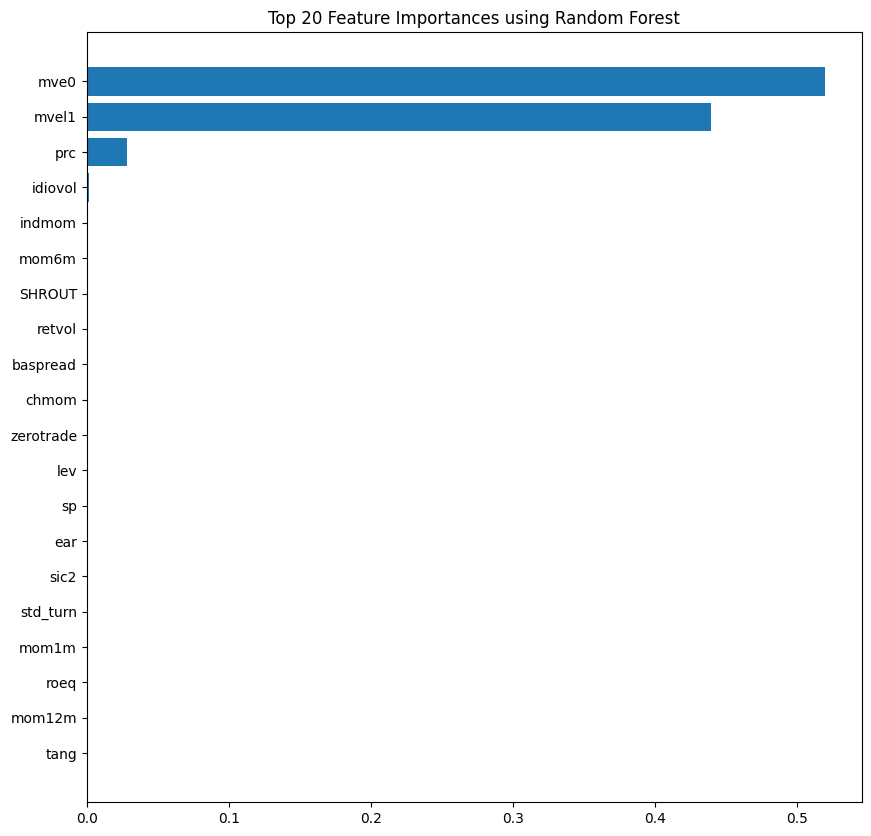

In [ ]:
def calculate_rf_importances(rf, X, y):


    scores = np.zeros(X.shape[1])
    base_score = rf.score(X, y)

    for i in range(X.shape[1]):
        X_shuffled = X.copy()
        X_shuffled[X.columns[i]] = np.random.permutation(X[X.columns[i]].to_pandas().values)
        drop_in_score = base_score - rf.score(X_shuffled, y)
        scores[i] = drop_in_score

    return scores


# Assuming your RF model is named rf
importances = calculate_rf_importances(rf_model, X_train, y_train)
norm_importances=importances / np.sum(importances)
indices = np.argsort(norm_importances)[-20:]  # top 20 features

# Plotting
plt.figure(figsize=(10, 10))
plt.title("Top 20 Feature Importances using Random Forest")
plt.barh(range(len(indices)), norm_importances[indices], align="center")
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.show()








In [ ]:
R2_rf_all=[]
R2_rf_top=[]
R2_rf_bottom=[]
for i in tqdm(range(len(splits)), desc="Processing"):
  train_data_split=splits[i]['training']
  validation_data_split=splits[i]['validation']
  test_data_split=splits[i]['testing']


  # Training data
  X_train_split = train_data[X_columns].astype('float32')
  y_train_split = train_data["RET"].astype('float32')

  # Validation data
  X_validation_split = validation_data[X_columns].astype('float32')
  y_validation_split = validation_data["RET"].astype('float32')

  # Test data
  X_test_split = test_data_split[X_columns].astype('float32')
  y_test_split = test_data_split["RET"].astype('float32')


  rf_model = RandomForestRegressor(n_estimators=10, max_depth=10,min_samples_split=10,min_samples_leaf=2)

  # Train the model
  rf_model.fit(X_train_split , y_train_split)


  # Group by 'permno' and compute the mean of 'mvel1' for each stock
  mean_mvel1 = test_data_split.groupby('permno')['mvel1'].mean()

  # Sort stocks by average 'mvel1' value
  sorted_permnos = mean_mvel1.sort_values(ascending=False)

  # Get the permno values for the top and bottom 1000 stocks
  top_1000_permnos = sorted_permnos.head(1000).index
  bottom_1000_permnos = sorted_permnos.tail(1000).index

  # Filter the original test data to create datasets for the top and bottom stocks
  X_test_top = test_data_split[test_data_split['permno'].isin(top_1000_permnos)][X_columns]
  y_test_top = test_data_split[test_data_split['permno'].isin(top_1000_permnos)]['RET']

  X_test_bottom = test_data_split[test_data_split['permno'].isin(bottom_1000_permnos)][X_columns]
  y_test_bottom = test_data_split[test_data_split['permno'].isin(bottom_1000_permnos)]['RET']

  y_pred_rf_split = rf_model.predict(X_test_split)
  y_pred_rf_split_np=y_pred_rf_split.to_pandas().values
  y_test_split_np = y_test_split.to_pandas().values
  r2_temp = r2_score(y_test_split_np, y_pred_rf_split_np)
  R2_rf_all.append(r2_temp)

  y_pred_rf_top_split = rf_model.predict(X_test_top)
  y_pred_rf_top_split_np=y_pred_rf_top_split.to_pandas().values
  y_test_top_split_np = y_test_top.to_pandas().values
  r2_temp_top = r2_score(y_test_top_split_np, y_pred_rf_top_split_np)
  R2_rf_top.append(r2_temp_top)

  y_pred_rf_bottom_split = rf_model.predict(X_test_bottom)
  y_pred_rf_bottom_split_np=y_pred_rf_bottom_split.to_pandas().values
  y_test_bottom_split_np = y_test_bottom.to_pandas().values
  r2_temp_bottom = r2_score(y_test_bottom_split_np, y_pred_rf_bottom_split_np)
  R2_rf_bottom.append(r2_temp_bottom)


Processing:   0%|          | 0/17 [00:00<?, ?it/s]

## **NN**

In [ ]:
class StockPredictor(nn.Module):
    def __init__(self, input_dim, hidden_dim, architecture, activation_function="ReLU"):
        super(StockPredictor, self).__init__()

        self.architecture = architecture
        self.dropout = nn.Dropout(0.5)

        # Define activation function based on the choice
        if activation_function == "ReLU":
            self.activation = nn.ReLU()
        elif activation_function == "LeakyReLU":
            self.activation = nn.LeakyReLU()
        elif activation_function == "ELU":
            self.activation = nn.ELU()
        else:
            raise ValueError(f"Unsupported activation function: {activation_function}")

        if architecture == "NN1":
            self.net = nn.Sequential(
                nn.Linear(input_dim, hidden_dim),
                self.activation,
                nn.Linear(hidden_dim, 1)
            )
        elif architecture == "NN2":
            self.net = nn.Sequential(
                nn.Linear(input_dim, hidden_dim),
                self.activation,
                self.dropout,
                nn.Linear(hidden_dim, hidden_dim),
                self.activation,
                nn.Linear(hidden_dim, 1)
            )
        elif architecture == "NN3":
            self.net = nn.Sequential(
                nn.Linear(input_dim, hidden_dim),
                self.activation,
                self.dropout,
                nn.Linear(hidden_dim, hidden_dim),
                self.activation,
                nn.Linear(hidden_dim, hidden_dim),
                self.activation,
                nn.Linear(hidden_dim, 1)
            )
        elif architecture == "NN4":
            self.net = nn.Sequential(
                nn.Linear(input_dim, hidden_dim),
                self.activation,
                self.dropout,
                nn.Linear(hidden_dim, hidden_dim),
                self.activation,
                self.dropout,
                nn.Linear(hidden_dim, hidden_dim),
                self.activation,
                nn.Linear(hidden_dim, hidden_dim),
                self.activation,
                nn.Linear(hidden_dim, 1)
            )
        elif architecture == "NN5":
            self.net = nn.Sequential(
                nn.Linear(input_dim, hidden_dim),
                self.activation,
                self.dropout,
                nn.Linear(hidden_dim, hidden_dim),
                self.activation,
                self.dropout,
                nn.Linear(hidden_dim, hidden_dim),
                self.activation,
                self.dropout,
                nn.Linear(hidden_dim, hidden_dim),
                self.activation,
                nn.Linear(hidden_dim, hidden_dim),
                self.activation,
                nn.Linear(hidden_dim, 1)
            )

    def forward(self, x):
        return self.net(x)




class NeuralNetworks:
    def __init__(self, cleaned_df, input_dim, architecture, batch_size=32, hidden_dim=32):
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
        self.batch_size = batch_size
        self.scaler = MinMaxScaler()
        self.target_scaler = MinMaxScaler()
        # Storing feature names from cleaned_df for feature importance plotting
        self.columns = cleaned_df.columns

        #self.model = StockPredictor(input_dim, hidden_dim=hidden_dim, architecture=architecture).to(self.device)
        self.model = StockPredictor(input_dim, hidden_dim=hidden_dim, architecture=architecture,activation_function="LeakyReLU").to(self.device)
        self.criterion = torch.nn.MSELoss(reduction='mean')
        self.optimizer = optim.Adam(self.model.parameters(), lr=1e-3, weight_decay=1e-5)
        self.scheduler = optim.lr_scheduler.ReduceLROnPlateau(self.optimizer, 'min', patience=5, factor=0.1, verbose=True)

    def load_data(self, X_train, y_train, X_validation, y_validation):
        X_train_np = X_train.to_pandas().values
        X_validation_np = X_validation.to_pandas().values

        # Scaling and converting the data to tensors
        X_train_scaled = self.scaler.fit_transform(X_train_np)
        X_validation_scaled = self.scaler.transform(X_validation_np)

        y_train_np = y_train.to_pandas().values
        y_validation_np = y_validation.to_pandas().values

        y_train_scaled = self.target_scaler.fit_transform(y_train_np.reshape(-1, 1))
        y_validation_scaled = self.target_scaler.transform(y_validation_np.reshape(-1, 1))

        self.y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32).to(self.device).squeeze()
        self.y_validation_tensor = torch.tensor(y_validation_scaled, dtype=torch.float32).to(self.device).squeeze()

        self.X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).to(self.device)
        self.X_validation_tensor = torch.tensor(X_validation_scaled, dtype=torch.float32).to(self.device)

        # Datasets and Dataloaders
        self.train_dataset = data.TensorDataset(self.X_train_tensor, self.y_train_tensor)
        self.validation_dataset = data.TensorDataset(self.X_validation_tensor, self.y_validation_tensor)

        self.train_loader = data.DataLoader(dataset=self.train_dataset, batch_size=self.batch_size, shuffle=True)
        self.validation_loader = data.DataLoader(dataset=self.validation_dataset, batch_size=self.batch_size, shuffle=False)

    def train_model(self, epochs=100, patience=10):
        best_val_loss = float("inf")
        epochs_without_improvement = 0

        for epoch in tqdm(range(epochs), desc="Processing"):
            total_loss = 0.0
            self.model.train()
            for batch_features, batch_labels in self.train_loader:
                self.optimizer.zero_grad()
                outputs = self.model(batch_features).squeeze()  # Modify the output shape
                loss = self.criterion(outputs, batch_labels)
                loss.backward()
                self.optimizer.step()
                total_loss += loss.item() * len(batch_features)

            # Compute the average loss
            avg_train_loss = total_loss / len(self.train_loader.dataset)

            # Validation loss
            val_loss = self.evaluate(self.validation_loader)

            # Step the scheduler based on the validation loss
            self.scheduler.step(val_loss)

            if val_loss < best_val_loss:
                best_val_loss = val_loss
                epochs_without_improvement = 0
            else:
                epochs_without_improvement += 1

            if epochs_without_improvement == patience:
                print("Early stopping due to no improvement after {} epochs.".format(patience))
                break

            print("Epoch {}, Training Loss: {:.4f}, Validation Loss: {:.4f}".format(epoch, avg_train_loss, val_loss))

    def evaluate(self, loader):
        self.model.eval()  # set the model to evaluation mode
        total_loss = 0.0
        with torch.no_grad():
            for batch_features, batch_labels in loader:
                batch_features, batch_labels = batch_features.to(self.device), batch_labels.to(self.device)
                predictions = self.model(batch_features).squeeze()
                loss = self.criterion(predictions, batch_labels)
                total_loss += loss.item() * len(batch_features)
        return total_loss / len(loader.dataset)
    def evaluate_test(self, X_test, y_test):
        X_test_np = X_test.to_pandas().values
        X_test_scaled = self.scaler.transform(X_test_np)

        y_test_np = y_test.to_pandas().values
        y_test_scaled = self.target_scaler.transform(y_test_np.reshape(-1, 1))

        self.X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).to(self.device)
        self.y_test_tensor = torch.tensor(y_test_scaled, dtype=torch.float32).to(self.device).squeeze()
        self.test_dataset = data.TensorDataset(self.X_test_tensor, self.y_test_tensor)
        self.test_loader = data.DataLoader(dataset=self.test_dataset, batch_size=self.batch_size, shuffle=False)

        test_loss = self.evaluate(self.test_loader)
        with torch.no_grad():
            predictions = torch.cat([self.model(batch_features).detach() for batch_features, _ in self.test_loader], dim=0)
            # After getting the predictions
            predictions_original_scale = self.target_scaler.inverse_transform(predictions)
            actuals = self.y_test_tensor
            actuals_original_scale = self.target_scaler.inverse_transform(actuals.reshape(-1, 1)).squeeze()

        y_pred_cudf = cudf.Series(predictions_original_scale)
        y_true_cudf = cudf.Series(actuals_original_scale)

        y_pred_cudf = y_pred_cudf.astype('float64')
        y_true_cudf = y_true_cudf.astype('float64')

        # Calculate the residuals
        residuals = y_true_cudf - y_pred_cudf

        # Calculate the residual sum of squares (SS_res)
        SS_res = (residuals**2).sum()

        # Calculate the total sum of squares (SS_tot)
        mean_y_true = y_true_cudf.mean()
        SS_tot = ((y_true_cudf - mean_y_true)**2).sum()

        # Compute R^2
        R2 = 1 - (SS_res / SS_tot)
        return R2
    def plot_feature_importances(self, n_features=20, title="Feature Importances"):
        # Extracting the weights from the first layer
        weights = self.model.net[0].weight.data.abs().mean(dim=0).cpu().numpy()

        # Normalize the weights so they sum up to 1
        normalized_weights = weights / np.sum(weights)

        # Sorting the weights and getting the top features
        sorted_idx = np.argsort(normalized_weights)[::-1]
        top_idx = sorted_idx[:n_features]

        # Plotting the top feature importances
        plt.figure(figsize=(12, 8))
        plt.title(title)
        plt.barh(range(n_features), normalized_weights[top_idx], align="center")
        plt.yticks(range(n_features), [self.columns[i] for i in top_idx])
        plt.gca().invert_yaxis()
        plt.xlabel("Feature Importance")
        plt.tight_layout()
        plt.show()



In [ ]:
print('NN1 is begin!')
Model_nn1 = NeuralNetworks(cleaned_df, input_dim = X_train.shape[1] , architecture="NN1")
Model_nn1.load_data(X_train, y_train, X_validation, y_validation)
Model_nn1.train_model()
print('NN1 is complted!')

print('NN2 is begin!')
Model_nn2 = NeuralNetworks(cleaned_df, input_dim = X_train.shape[1] , architecture="NN2")
Model_nn2.load_data(X_train, y_train, X_validation, y_validation)
Model_nn2.train_model()
print('NN2 is complted!')

print('NN3 is begin!')
Model_nn3 = NeuralNetworks(cleaned_df, input_dim = X_train.shape[1] , architecture="NN3")
Model_nn3.load_data(X_train, y_train, X_validation, y_validation)
Model_nn3.train_model()
print('NN3 is complted!')

print('NN4 is begin!')
Model_nn4 = NeuralNetworks(cleaned_df, input_dim = X_train.shape[1] , architecture="NN4")
Model_nn4.load_data(X_train, y_train, X_validation, y_validation)
Model_nn4.train_model()
print('NN4 is complted!')

print('NN5 is begin!')
Model_nn5 = NeuralNetworks(cleaned_df, input_dim = X_train.shape[1] , architecture="NN5")
Model_nn5.load_data(X_train, y_train, X_validation, y_validation)
Model_nn5.train_model()
print('NN5 is complted!')


NN1 is begin!


Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 0.0023, Validation Loss: 0.0029
Epoch 1, Training Loss: 0.0014, Validation Loss: 0.0028
Epoch 2, Training Loss: 0.0014, Validation Loss: 0.0028
Epoch 3, Training Loss: 0.0014, Validation Loss: 0.0027
Epoch 4, Training Loss: 0.0014, Validation Loss: 0.0028
Epoch 5, Training Loss: 0.0014, Validation Loss: 0.0027
Epoch 6, Training Loss: 0.0014, Validation Loss: 0.0027
Epoch 7, Training Loss: 0.0014, Validation Loss: 0.0027
Epoch 8, Training Loss: 0.0014, Validation Loss: 0.0028
Epoch 9, Training Loss: 0.0013, Validation Loss: 0.0027
Epoch 10, Training Loss: 0.0014, Validation Loss: 0.0027
Epoch 11, Training Loss: 0.0013, Validation Loss: 0.0027
Epoch 12, Training Loss: 0.0013, Validation Loss: 0.0028
Epoch 13, Training Loss: 0.0013, Validation Loss: 0.0029
Epoch 14, Training Loss: 0.0013, Validation Loss: 0.0026
Epoch 15, Training Loss: 0.0013, Validation Loss: 0.0027
Epoch 16, Training Loss: 0.0013, Validation Loss: 0.0027
Epoch 17, Training Loss: 0.0013, Validati

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 0.0021, Validation Loss: 0.0029
Epoch 1, Training Loss: 0.0014, Validation Loss: 0.0028
Epoch 2, Training Loss: 0.0014, Validation Loss: 0.0028
Epoch 3, Training Loss: 0.0014, Validation Loss: 0.0028
Epoch 4, Training Loss: 0.0014, Validation Loss: 0.0028
Epoch 5, Training Loss: 0.0014, Validation Loss: 0.0028
Epoch 6, Training Loss: 0.0014, Validation Loss: 0.0028
Epoch 7, Training Loss: 0.0014, Validation Loss: 0.0028
Epoch 8, Training Loss: 0.0014, Validation Loss: 0.0028
Epoch 9, Training Loss: 0.0014, Validation Loss: 0.0028
Epoch 10, Training Loss: 0.0014, Validation Loss: 0.0028
Epoch 00012: reducing learning rate of group 0 to 1.0000e-04.
Epoch 11, Training Loss: 0.0014, Validation Loss: 0.0028
Epoch 12, Training Loss: 0.0014, Validation Loss: 0.0028
Epoch 13, Training Loss: 0.0014, Validation Loss: 0.0028
Epoch 14, Training Loss: 0.0014, Validation Loss: 0.0028
Epoch 15, Training Loss: 0.0014, Validation Loss: 0.0028
Epoch 16, Training Loss: 0.0014, Val

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 0.0028, Validation Loss: 0.0028
Epoch 1, Training Loss: 0.0014, Validation Loss: 0.0028
Epoch 2, Training Loss: 0.0014, Validation Loss: 0.0029
Epoch 3, Training Loss: 0.0014, Validation Loss: 0.0028
Epoch 4, Training Loss: 0.0014, Validation Loss: 0.0028
Epoch 5, Training Loss: 0.0014, Validation Loss: 0.0028
Epoch 6, Training Loss: 0.0014, Validation Loss: 0.0029
Epoch 7, Training Loss: 0.0014, Validation Loss: 0.0028
Epoch 8, Training Loss: 0.0014, Validation Loss: 0.0028
Epoch 9, Training Loss: 0.0014, Validation Loss: 0.0028
Epoch 10, Training Loss: 0.0014, Validation Loss: 0.0028
Epoch 11, Training Loss: 0.0014, Validation Loss: 0.0028
Epoch 12, Training Loss: 0.0014, Validation Loss: 0.0028
Epoch 13, Training Loss: 0.0014, Validation Loss: 0.0028
Epoch 14, Training Loss: 0.0014, Validation Loss: 0.0028
Epoch 00016: reducing learning rate of group 0 to 1.0000e-04.
Epoch 15, Training Loss: 0.0014, Validation Loss: 0.0028
Epoch 16, Training Loss: 0.0014, Val

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 0.0016, Validation Loss: 0.0028
Epoch 1, Training Loss: 0.0014, Validation Loss: 0.0028
Epoch 2, Training Loss: 0.0014, Validation Loss: 0.0028
Epoch 3, Training Loss: 0.0014, Validation Loss: 0.0028
Epoch 4, Training Loss: 0.0014, Validation Loss: 0.0028
Epoch 5, Training Loss: 0.0014, Validation Loss: 0.0029
Epoch 6, Training Loss: 0.0014, Validation Loss: 0.0028
Epoch 00008: reducing learning rate of group 0 to 1.0000e-04.
Epoch 7, Training Loss: 0.0014, Validation Loss: 0.0028
Epoch 8, Training Loss: 0.0014, Validation Loss: 0.0028
Epoch 9, Training Loss: 0.0014, Validation Loss: 0.0028
Epoch 10, Training Loss: 0.0014, Validation Loss: 0.0028
Epoch 11, Training Loss: 0.0014, Validation Loss: 0.0028
Epoch 12, Training Loss: 0.0014, Validation Loss: 0.0028
Epoch 13, Training Loss: 0.0014, Validation Loss: 0.0028
Epoch 14, Training Loss: 0.0014, Validation Loss: 0.0028
Epoch 15, Training Loss: 0.0014, Validation Loss: 0.0028
Epoch 00017: reducing learning rate 

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 0.0015, Validation Loss: 0.0028
Epoch 1, Training Loss: 0.0014, Validation Loss: 0.0029
Epoch 2, Training Loss: 0.0014, Validation Loss: 0.0028
Epoch 3, Training Loss: 0.0014, Validation Loss: 0.0028
Epoch 4, Training Loss: 0.0014, Validation Loss: 0.0028
Epoch 5, Training Loss: 0.0014, Validation Loss: 0.0028
Epoch 00007: reducing learning rate of group 0 to 1.0000e-04.
Epoch 6, Training Loss: 0.0014, Validation Loss: 0.0028
Epoch 7, Training Loss: 0.0014, Validation Loss: 0.0028
Epoch 8, Training Loss: 0.0014, Validation Loss: 0.0028
Epoch 9, Training Loss: 0.0014, Validation Loss: 0.0028
Early stopping due to no improvement after 10 epochs.
NN5 is complted!


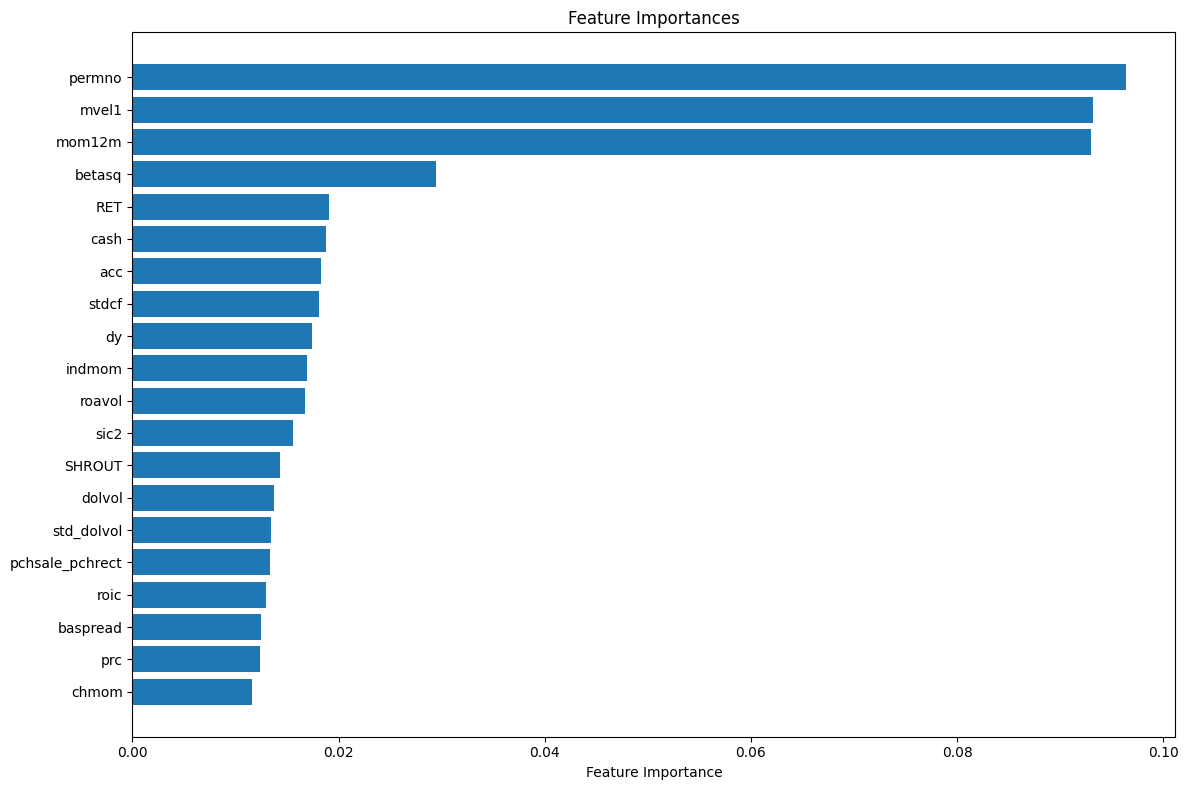

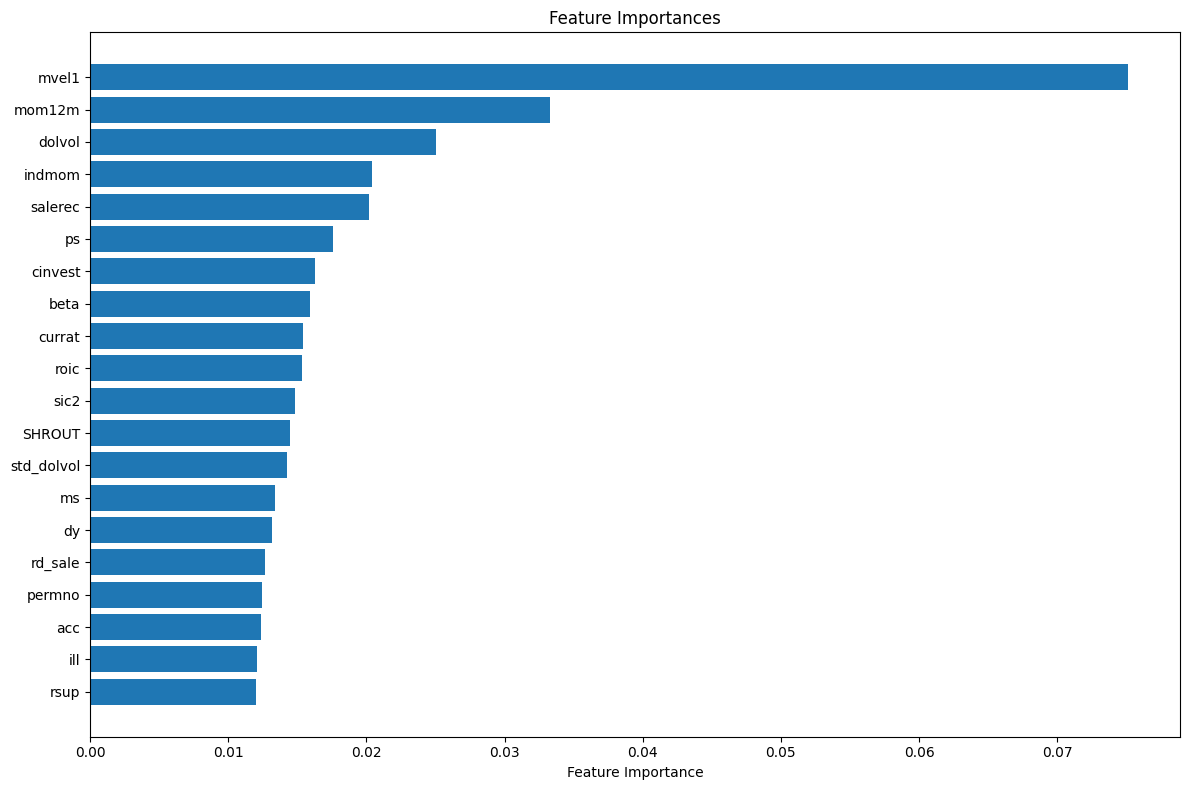

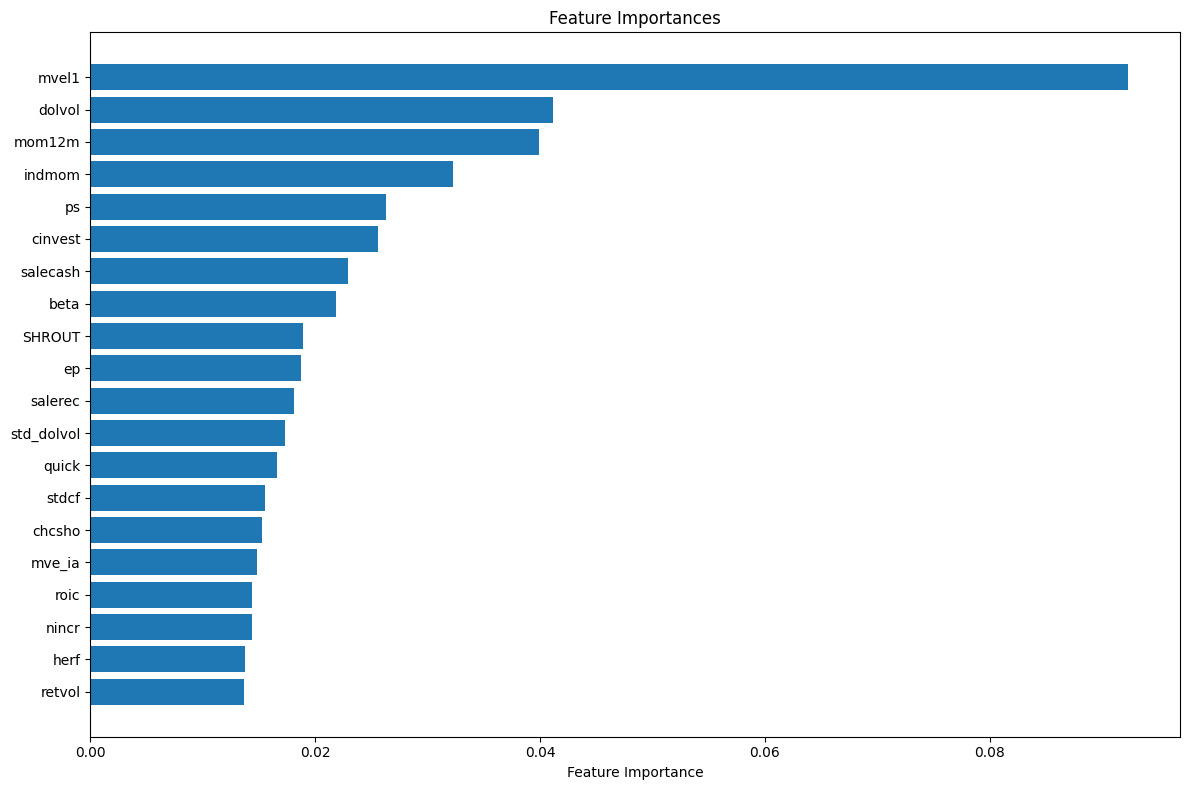

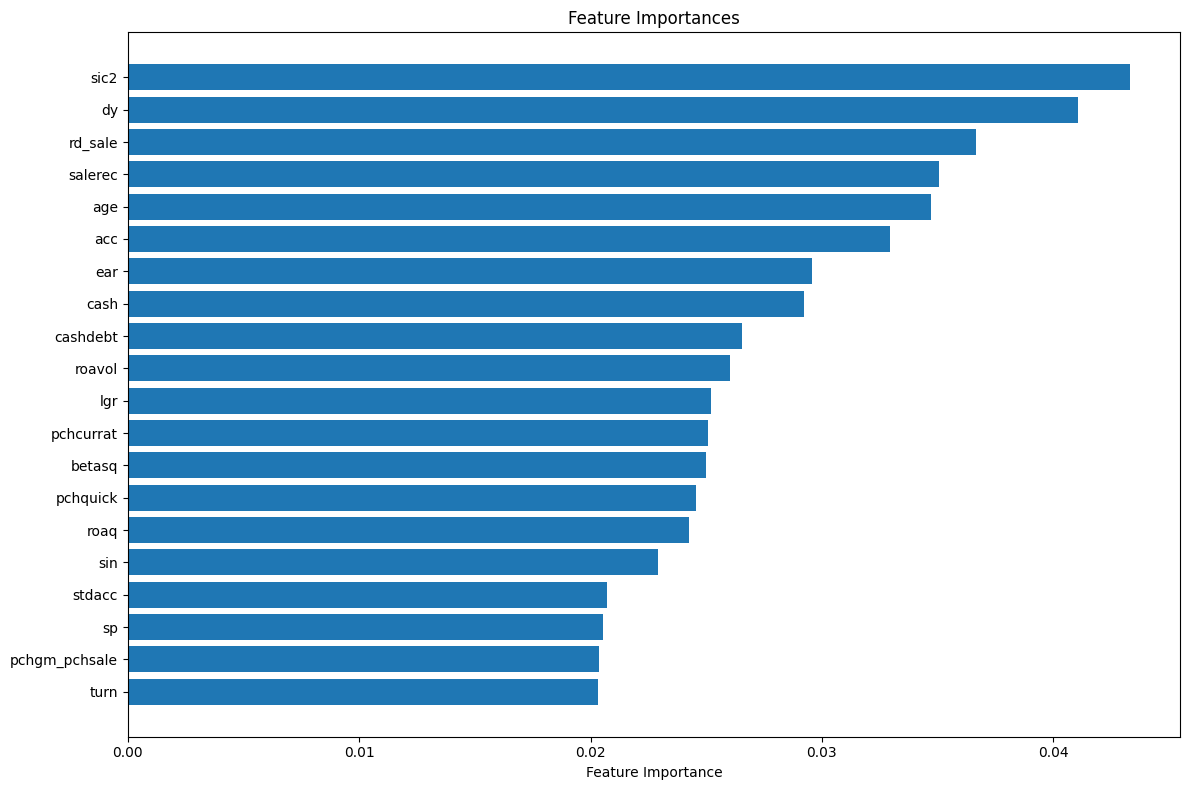

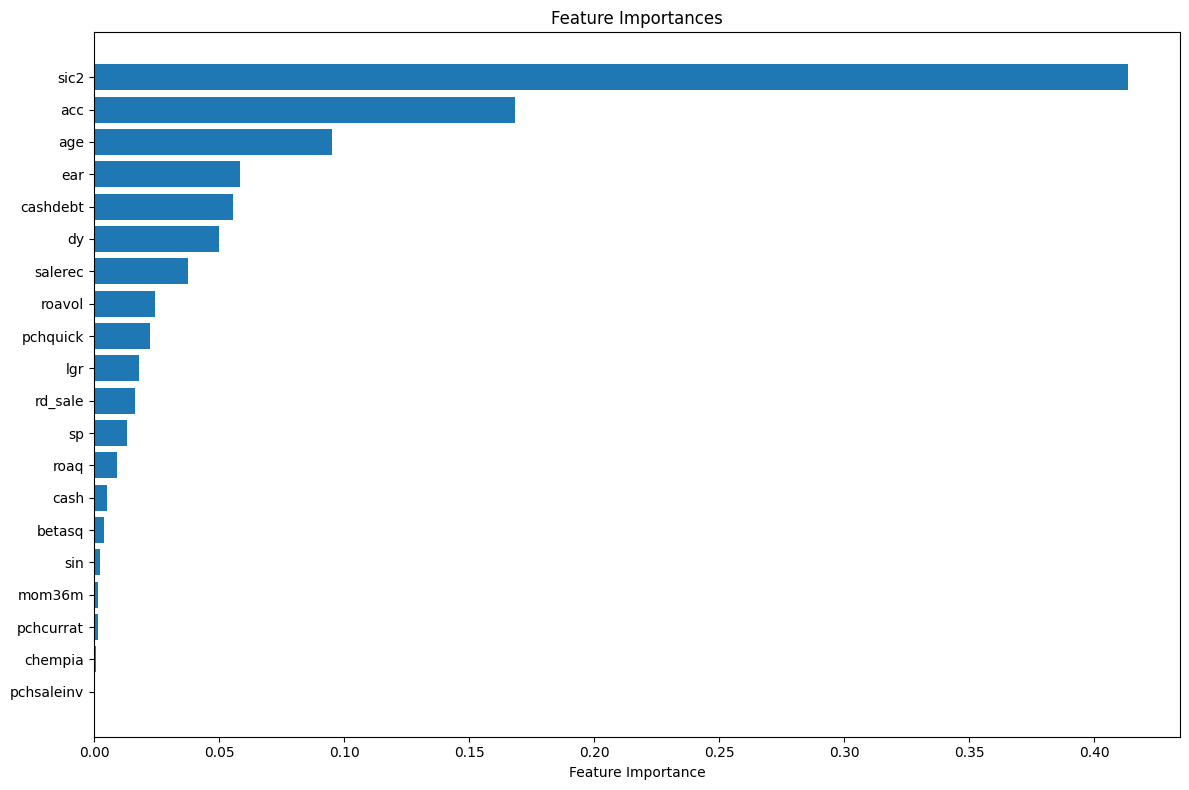

In [ ]:
Model_nn1.plot_feature_importances()
Model_nn2.plot_feature_importances()
Model_nn3.plot_feature_importances()
Model_nn4.plot_feature_importances()
Model_nn5.plot_feature_importances()


In [ ]:
R2_nn1_all=[]
R2_nn1_top=[]
R2_nn1_bottom=[]

R2_nn2_all=[]
R2_nn2_top=[]
R2_nn2_bottom=[]

R2_nn3_all=[]
R2_nn3_top=[]
R2_nn3_bottom=[]

R2_nn4_all=[]
R2_nn4_top=[]
R2_nn4_bottom=[]

R2_nn5_all=[]
R2_nn5_top=[]
R2_nn5_bottom=[]


for i in tqdm(range(len(splits)), desc="Processing"):
  train_data_split=splits[i]['training']
  validation_data_split=splits[i]['validation']
  test_data_split=splits[i]['testing']


  # Training data
  X_train_split = train_data[X_columns]
  y_train_split = train_data["RET"]

  # Validation data
  X_validation_split = validation_data[X_columns]
  y_validation_split = validation_data["RET"]

  # Test data
  X_test_split = test_data_split[X_columns]
  y_test_split = test_data_split["RET"]

  Model_nn2 = NeuralNetworks(cleaned_df, input_dim = X_train.shape[1] , architecture="NN2")
  Model_nn2.load_data(X_train_split, y_train_split, X_validation_split, y_validation_split)
  Model_nn2.train_model()


  Model_nn3 = NeuralNetworks(cleaned_df, input_dim = X_train.shape[1] , architecture="NN3")
  Model_nn3.load_data(X_train_split, y_train_split, X_validation_split, y_validation_split)
  Model_nn3.train_model()

  Model_nn4 = NeuralNetworks(cleaned_df, input_dim = X_train.shape[1] , architecture="NN4")
  Model_nn4.load_data(X_train_split, y_train_split, X_validation_split, y_validation_split)
  Model_nn4.train_model()

  # Group by 'permno' and compute the mean of 'mvel1' for each stock
  mean_mvel1 = test_data_split.groupby('permno')['mvel1'].mean()

  # Sort stocks by average 'mvel1' value
  sorted_permnos = mean_mvel1.sort_values(ascending=False)

  # Get the permno values for the top and bottom 1000 stocks
  top_1000_permnos = sorted_permnos.head(1000).index
  bottom_1000_permnos = sorted_permnos.tail(1000).index

  # Filter the original test data to create datasets for the top and bottom stocks
  X_test_top = test_data_split[test_data_split['permno'].isin(top_1000_permnos)][X_columns]
  y_test_top = test_data_split[test_data_split['permno'].isin(top_1000_permnos)]['RET']

  X_test_bottom = test_data_split[test_data_split['permno'].isin(bottom_1000_permnos)][X_columns]
  y_test_bottom = test_data_split[test_data_split['permno'].isin(bottom_1000_permnos)]['RET']

  r2_1=Model_nn1.evaluate_test(X_test, y_test)
  r2_1_top=Model_nn1.evaluate_test(X_test_top, y_test_top)
  r2_1_bottom=Model_nn1.evaluate_test(X_test_bottom, y_test_bottom)
  R2_nn1_all.append(r2_1)
  R2_nn1_top.append(r2_1_top)
  R2_nn1_bottom.append(r2_1_bottom)

  r2_2=Model_nn2.evaluate_test(X_test_split, y_test_split)
  r2_2_top=Model_nn2.evaluate_test(X_test_top, y_test_top)
  r2_2_bottom=Model_nn2.evaluate_test(X_test_bottom, y_test_bottom)
  R2_nn2_all.append(r2_2)
  R2_nn2_top.append(r2_2_top)
  R2_nn2_bottom.append(r2_2_bottom)

  r2_3=Model_nn3.evaluate_test(X_test_split, y_test_split)
  r2_3_top=Model_nn3.evaluate_test(X_test_top, y_test_top)
  r2_3_bottom=Model_nn3.evaluate_test(X_test_bottom, y_test_bottom)
  R2_nn3_all.append(r2_3)
  R2_nn3_top.append(r2_3_top)
  R2_nn3_bottom.append(r2_3_bottom)

  r2_4=Model_nn4.evaluate_test(X_test_split, y_test_split)
  r2_4_top=Model_nn4.evaluate_test(X_test_top, y_test_top)
  r2_4_bottom=Model_nn4.evaluate_test(X_test_bottom, y_test_bottom)
  R2_nn4_all.append(r2_4)
  R2_nn4_top.append(r2_4_top)
  R2_nn4_bottom.append(r2_4_bottom)

  r2_5=Model_nn5.evaluate_test(X_test_split, y_test_split)
  r2_5_top=Model_nn5.evaluate_test(X_test_top, y_test_top)
  r2_5_bottom=Model_nn5.evaluate_test(X_test_bottom, y_test_bottom)
  R2_nn5_all.append(r2_5)
  R2_nn5_top.append(r2_5_top)
  R2_nn5_bottom.append(r2_5_bottom)


Processing:   0%|          | 0/17 [00:00<?, ?it/s]

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 1.0008, Validation Loss: 2.0340
Epoch 1, Training Loss: 0.9911, Validation Loss: 2.0246
Epoch 2, Training Loss: 0.9826, Validation Loss: 2.0125
Epoch 3, Training Loss: 0.9772, Validation Loss: 2.0038
Epoch 4, Training Loss: 0.9701, Validation Loss: 1.9892
Epoch 5, Training Loss: 0.9619, Validation Loss: 1.9891
Epoch 6, Training Loss: 0.9575, Validation Loss: 1.9750
Epoch 7, Training Loss: 0.9565, Validation Loss: 1.9747
Epoch 8, Training Loss: 0.9485, Validation Loss: 1.9762
Epoch 9, Training Loss: 0.9464, Validation Loss: 1.9652
Epoch 10, Training Loss: 0.9448, Validation Loss: 1.9644
Epoch 11, Training Loss: 0.9361, Validation Loss: 1.9656
Epoch 12, Training Loss: 0.9380, Validation Loss: 1.9590
Epoch 13, Training Loss: 0.9363, Validation Loss: 1.9621
Epoch 14, Training Loss: 0.9322, Validation Loss: 1.9628
Epoch 15, Training Loss: 0.9280, Validation Loss: 1.9692
Epoch 16, Training Loss: 0.9233, Validation Loss: 1.9571
Epoch 17, Training Loss: 0.9238, Validati

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 0.9990, Validation Loss: 2.0336
Epoch 1, Training Loss: 0.9873, Validation Loss: 2.0265
Epoch 2, Training Loss: 0.9814, Validation Loss: 2.0127
Epoch 3, Training Loss: 0.9727, Validation Loss: 1.9979
Epoch 4, Training Loss: 0.9671, Validation Loss: 1.9841
Epoch 5, Training Loss: 0.9648, Validation Loss: 1.9801
Epoch 6, Training Loss: 0.9561, Validation Loss: 1.9777
Epoch 7, Training Loss: 0.9512, Validation Loss: 1.9619
Epoch 8, Training Loss: 0.9485, Validation Loss: 1.9646
Epoch 9, Training Loss: 0.9433, Validation Loss: 1.9561
Epoch 10, Training Loss: 0.9411, Validation Loss: 1.9459
Epoch 11, Training Loss: 0.9393, Validation Loss: 1.9431
Epoch 12, Training Loss: 0.9348, Validation Loss: 1.9498
Epoch 13, Training Loss: 0.9276, Validation Loss: 1.9380
Epoch 14, Training Loss: 0.9280, Validation Loss: 1.9365
Epoch 15, Training Loss: 0.9237, Validation Loss: 1.9323
Epoch 16, Training Loss: 0.9237, Validation Loss: 1.9354
Epoch 17, Training Loss: 0.9217, Validati

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 1.0002, Validation Loss: 2.0366
Epoch 1, Training Loss: 0.9938, Validation Loss: 2.0275
Epoch 2, Training Loss: 0.9872, Validation Loss: 2.0120
Epoch 3, Training Loss: 0.9778, Validation Loss: 2.0063
Epoch 4, Training Loss: 0.9752, Validation Loss: 2.0019
Epoch 5, Training Loss: 0.9704, Validation Loss: 1.9902
Epoch 6, Training Loss: 0.9667, Validation Loss: 1.9856
Epoch 7, Training Loss: 0.9591, Validation Loss: 1.9770
Epoch 8, Training Loss: 0.9563, Validation Loss: 1.9695
Epoch 9, Training Loss: 0.9578, Validation Loss: 1.9620
Epoch 10, Training Loss: 0.9522, Validation Loss: 1.9615
Epoch 11, Training Loss: 0.9454, Validation Loss: 1.9680
Epoch 12, Training Loss: 0.9453, Validation Loss: 1.9564
Epoch 13, Training Loss: 0.9401, Validation Loss: 1.9567
Epoch 14, Training Loss: 0.9384, Validation Loss: 1.9546
Epoch 15, Training Loss: 0.9376, Validation Loss: 1.9469
Epoch 16, Training Loss: 0.9338, Validation Loss: 1.9433
Epoch 17, Training Loss: 0.9307, Validati

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 1.0022, Validation Loss: 2.0280
Epoch 1, Training Loss: 0.9890, Validation Loss: 2.0141
Epoch 2, Training Loss: 0.9785, Validation Loss: 2.0143
Epoch 3, Training Loss: 0.9744, Validation Loss: 1.9975
Epoch 4, Training Loss: 0.9672, Validation Loss: 1.9917
Epoch 5, Training Loss: 0.9646, Validation Loss: 1.9860
Epoch 6, Training Loss: 0.9555, Validation Loss: 1.9784
Epoch 7, Training Loss: 0.9553, Validation Loss: 1.9665
Epoch 8, Training Loss: 0.9475, Validation Loss: 1.9646
Epoch 9, Training Loss: 0.9463, Validation Loss: 1.9624
Epoch 10, Training Loss: 0.9397, Validation Loss: 1.9615
Epoch 11, Training Loss: 0.9328, Validation Loss: 1.9493
Epoch 12, Training Loss: 0.9306, Validation Loss: 1.9553
Epoch 13, Training Loss: 0.9278, Validation Loss: 1.9349
Epoch 14, Training Loss: 0.9263, Validation Loss: 1.9537
Epoch 15, Training Loss: 0.9222, Validation Loss: 1.9570
Epoch 16, Training Loss: 0.9190, Validation Loss: 1.9492
Epoch 17, Training Loss: 0.9158, Validati

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 0.9995, Validation Loss: 2.0320
Epoch 1, Training Loss: 0.9882, Validation Loss: 2.0223
Epoch 2, Training Loss: 0.9801, Validation Loss: 2.0089
Epoch 3, Training Loss: 0.9733, Validation Loss: 2.0022
Epoch 4, Training Loss: 0.9685, Validation Loss: 1.9946
Epoch 5, Training Loss: 0.9613, Validation Loss: 1.9841
Epoch 6, Training Loss: 0.9555, Validation Loss: 1.9743
Epoch 7, Training Loss: 0.9497, Validation Loss: 1.9688
Epoch 8, Training Loss: 0.9452, Validation Loss: 1.9683
Epoch 9, Training Loss: 0.9463, Validation Loss: 1.9536
Epoch 10, Training Loss: 0.9401, Validation Loss: 1.9587
Epoch 11, Training Loss: 0.9342, Validation Loss: 1.9446
Epoch 12, Training Loss: 0.9346, Validation Loss: 1.9560
Epoch 13, Training Loss: 0.9311, Validation Loss: 1.9510
Epoch 14, Training Loss: 0.9265, Validation Loss: 1.9455
Epoch 15, Training Loss: 0.9238, Validation Loss: 1.9371
Epoch 16, Training Loss: 0.9195, Validation Loss: 1.9407
Epoch 17, Training Loss: 0.9158, Validati

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 0.9998, Validation Loss: 2.0376
Epoch 1, Training Loss: 0.9942, Validation Loss: 2.0311
Epoch 2, Training Loss: 0.9885, Validation Loss: 2.0246
Epoch 3, Training Loss: 0.9833, Validation Loss: 2.0138
Epoch 4, Training Loss: 0.9775, Validation Loss: 1.9996
Epoch 5, Training Loss: 0.9744, Validation Loss: 1.9983
Epoch 6, Training Loss: 0.9721, Validation Loss: 1.9935
Epoch 7, Training Loss: 0.9660, Validation Loss: 1.9871
Epoch 8, Training Loss: 0.9627, Validation Loss: 1.9789
Epoch 9, Training Loss: 0.9591, Validation Loss: 1.9754
Epoch 10, Training Loss: 0.9553, Validation Loss: 1.9664
Epoch 11, Training Loss: 0.9531, Validation Loss: 1.9646
Epoch 12, Training Loss: 0.9468, Validation Loss: 1.9684
Epoch 13, Training Loss: 0.9471, Validation Loss: 1.9628
Epoch 14, Training Loss: 0.9407, Validation Loss: 1.9580
Epoch 15, Training Loss: 0.9394, Validation Loss: 1.9507
Epoch 16, Training Loss: 0.9381, Validation Loss: 1.9555
Epoch 17, Training Loss: 0.9318, Validati

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 1.0016, Validation Loss: 2.0353
Epoch 1, Training Loss: 0.9896, Validation Loss: 2.0211
Epoch 2, Training Loss: 0.9820, Validation Loss: 2.0125
Epoch 3, Training Loss: 0.9765, Validation Loss: 2.0058
Epoch 4, Training Loss: 0.9688, Validation Loss: 1.9924
Epoch 5, Training Loss: 0.9654, Validation Loss: 1.9892
Epoch 6, Training Loss: 0.9601, Validation Loss: 1.9875
Epoch 7, Training Loss: 0.9524, Validation Loss: 1.9693
Epoch 8, Training Loss: 0.9496, Validation Loss: 1.9741
Epoch 9, Training Loss: 0.9446, Validation Loss: 1.9770
Epoch 10, Training Loss: 0.9444, Validation Loss: 1.9597
Epoch 11, Training Loss: 0.9347, Validation Loss: 1.9473
Epoch 12, Training Loss: 0.9336, Validation Loss: 1.9576
Epoch 13, Training Loss: 0.9271, Validation Loss: 1.9608
Epoch 14, Training Loss: 0.9265, Validation Loss: 1.9582
Epoch 15, Training Loss: 0.9243, Validation Loss: 1.9356
Epoch 16, Training Loss: 0.9168, Validation Loss: 1.9486
Epoch 17, Training Loss: 0.9203, Validati

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 0.9996, Validation Loss: 2.0348
Epoch 1, Training Loss: 0.9906, Validation Loss: 2.0260
Epoch 2, Training Loss: 0.9829, Validation Loss: 2.0121
Epoch 3, Training Loss: 0.9740, Validation Loss: 2.0047
Epoch 4, Training Loss: 0.9700, Validation Loss: 1.9963
Epoch 5, Training Loss: 0.9639, Validation Loss: 1.9884
Epoch 6, Training Loss: 0.9608, Validation Loss: 1.9753
Epoch 7, Training Loss: 0.9528, Validation Loss: 1.9717
Epoch 8, Training Loss: 0.9488, Validation Loss: 1.9627
Epoch 9, Training Loss: 0.9447, Validation Loss: 1.9492
Epoch 10, Training Loss: 0.9404, Validation Loss: 1.9515
Epoch 11, Training Loss: 0.9398, Validation Loss: 1.9609
Epoch 12, Training Loss: 0.9353, Validation Loss: 1.9475
Epoch 13, Training Loss: 0.9330, Validation Loss: 1.9449
Epoch 14, Training Loss: 0.9300, Validation Loss: 1.9401
Epoch 15, Training Loss: 0.9260, Validation Loss: 1.9451
Epoch 16, Training Loss: 0.9192, Validation Loss: 1.9556
Epoch 17, Training Loss: 0.9194, Validati

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 0.9997, Validation Loss: 2.0365
Epoch 1, Training Loss: 0.9956, Validation Loss: 2.0258
Epoch 2, Training Loss: 0.9883, Validation Loss: 2.0138
Epoch 3, Training Loss: 0.9805, Validation Loss: 2.0106
Epoch 4, Training Loss: 0.9766, Validation Loss: 2.0048
Epoch 5, Training Loss: 0.9713, Validation Loss: 1.9999
Epoch 6, Training Loss: 0.9676, Validation Loss: 1.9894
Epoch 7, Training Loss: 0.9622, Validation Loss: 1.9912
Epoch 8, Training Loss: 0.9591, Validation Loss: 1.9775
Epoch 9, Training Loss: 0.9557, Validation Loss: 1.9729
Epoch 10, Training Loss: 0.9589, Validation Loss: 1.9625
Epoch 11, Training Loss: 0.9506, Validation Loss: 1.9630
Epoch 12, Training Loss: 0.9482, Validation Loss: 1.9630
Epoch 13, Training Loss: 0.9465, Validation Loss: 1.9532
Epoch 14, Training Loss: 0.9443, Validation Loss: 1.9588
Epoch 15, Training Loss: 0.9402, Validation Loss: 1.9571
Epoch 16, Training Loss: 0.9384, Validation Loss: 1.9516
Epoch 17, Training Loss: 0.9365, Validati

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 1.0031, Validation Loss: 2.0337
Epoch 1, Training Loss: 0.9917, Validation Loss: 2.0164
Epoch 2, Training Loss: 0.9799, Validation Loss: 2.0045
Epoch 3, Training Loss: 0.9725, Validation Loss: 1.9979
Epoch 4, Training Loss: 0.9650, Validation Loss: 1.9870
Epoch 5, Training Loss: 0.9615, Validation Loss: 1.9724
Epoch 6, Training Loss: 0.9538, Validation Loss: 1.9757
Epoch 7, Training Loss: 0.9515, Validation Loss: 1.9672
Epoch 8, Training Loss: 0.9466, Validation Loss: 1.9629
Epoch 9, Training Loss: 0.9424, Validation Loss: 1.9566
Epoch 10, Training Loss: 0.9416, Validation Loss: 1.9547
Epoch 11, Training Loss: 0.9342, Validation Loss: 1.9538
Epoch 12, Training Loss: 0.9313, Validation Loss: 1.9680
Epoch 13, Training Loss: 0.9258, Validation Loss: 1.9559
Epoch 14, Training Loss: 0.9246, Validation Loss: 1.9529
Epoch 15, Training Loss: 0.9217, Validation Loss: 1.9495
Epoch 16, Training Loss: 0.9227, Validation Loss: 1.9521
Epoch 17, Training Loss: 0.9155, Validati

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 1.0005, Validation Loss: 2.0303
Epoch 1, Training Loss: 0.9907, Validation Loss: 2.0149
Epoch 2, Training Loss: 0.9813, Validation Loss: 2.0069
Epoch 3, Training Loss: 0.9716, Validation Loss: 1.9865
Epoch 4, Training Loss: 0.9668, Validation Loss: 1.9813
Epoch 5, Training Loss: 0.9609, Validation Loss: 1.9683
Epoch 6, Training Loss: 0.9563, Validation Loss: 1.9678
Epoch 7, Training Loss: 0.9482, Validation Loss: 1.9577
Epoch 8, Training Loss: 0.9464, Validation Loss: 1.9511
Epoch 9, Training Loss: 0.9391, Validation Loss: 1.9569
Epoch 10, Training Loss: 0.9384, Validation Loss: 1.9443
Epoch 11, Training Loss: 0.9312, Validation Loss: 1.9578
Epoch 12, Training Loss: 0.9317, Validation Loss: 1.9477
Epoch 13, Training Loss: 0.9303, Validation Loss: 1.9461
Epoch 14, Training Loss: 0.9272, Validation Loss: 1.9355
Epoch 15, Training Loss: 0.9224, Validation Loss: 1.9367
Epoch 16, Training Loss: 0.9196, Validation Loss: 1.9311
Epoch 17, Training Loss: 0.9183, Validati

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 0.9999, Validation Loss: 2.0368
Epoch 1, Training Loss: 0.9943, Validation Loss: 2.0353
Epoch 2, Training Loss: 0.9865, Validation Loss: 2.0294
Epoch 3, Training Loss: 0.9820, Validation Loss: 2.0223
Epoch 4, Training Loss: 0.9775, Validation Loss: 2.0073
Epoch 5, Training Loss: 0.9760, Validation Loss: 2.0051
Epoch 6, Training Loss: 0.9718, Validation Loss: 2.0004
Epoch 7, Training Loss: 0.9689, Validation Loss: 1.9858
Epoch 8, Training Loss: 0.9629, Validation Loss: 1.9886
Epoch 9, Training Loss: 0.9618, Validation Loss: 1.9810
Epoch 10, Training Loss: 0.9584, Validation Loss: 1.9807
Epoch 11, Training Loss: 0.9552, Validation Loss: 1.9713
Epoch 12, Training Loss: 0.9543, Validation Loss: 1.9719
Epoch 13, Training Loss: 0.9498, Validation Loss: 1.9659
Epoch 14, Training Loss: 0.9467, Validation Loss: 1.9707
Epoch 15, Training Loss: 0.9431, Validation Loss: 1.9570
Epoch 16, Training Loss: 0.9404, Validation Loss: 1.9586
Epoch 17, Training Loss: 0.9357, Validati

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 1.0009, Validation Loss: 2.0406
Epoch 1, Training Loss: 0.9916, Validation Loss: 2.0255
Epoch 2, Training Loss: 0.9846, Validation Loss: 2.0203
Epoch 3, Training Loss: 0.9774, Validation Loss: 2.0073
Epoch 4, Training Loss: 0.9710, Validation Loss: 1.9990
Epoch 5, Training Loss: 0.9637, Validation Loss: 1.9918
Epoch 6, Training Loss: 0.9600, Validation Loss: 1.9865
Epoch 7, Training Loss: 0.9533, Validation Loss: 1.9725
Epoch 8, Training Loss: 0.9491, Validation Loss: 1.9758
Epoch 9, Training Loss: 0.9448, Validation Loss: 1.9644
Epoch 10, Training Loss: 0.9425, Validation Loss: 1.9598
Epoch 11, Training Loss: 0.9367, Validation Loss: 1.9648
Epoch 12, Training Loss: 0.9383, Validation Loss: 1.9544
Epoch 13, Training Loss: 0.9323, Validation Loss: 1.9572
Epoch 14, Training Loss: 0.9318, Validation Loss: 1.9522
Epoch 15, Training Loss: 0.9272, Validation Loss: 1.9468
Epoch 16, Training Loss: 0.9279, Validation Loss: 1.9533
Epoch 17, Training Loss: 0.9223, Validati

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 0.9999, Validation Loss: 2.0336
Epoch 1, Training Loss: 0.9894, Validation Loss: 2.0180
Epoch 2, Training Loss: 0.9811, Validation Loss: 2.0103
Epoch 3, Training Loss: 0.9754, Validation Loss: 2.0046
Epoch 4, Training Loss: 0.9714, Validation Loss: 1.9980
Epoch 5, Training Loss: 0.9624, Validation Loss: 1.9936
Epoch 6, Training Loss: 0.9608, Validation Loss: 1.9871
Epoch 7, Training Loss: 0.9530, Validation Loss: 1.9823
Epoch 8, Training Loss: 0.9532, Validation Loss: 1.9829
Epoch 9, Training Loss: 0.9476, Validation Loss: 1.9735
Epoch 10, Training Loss: 0.9472, Validation Loss: 1.9623
Epoch 11, Training Loss: 0.9381, Validation Loss: 1.9669
Epoch 12, Training Loss: 0.9334, Validation Loss: 1.9670
Epoch 13, Training Loss: 0.9371, Validation Loss: 1.9558
Epoch 14, Training Loss: 0.9312, Validation Loss: 1.9619
Epoch 15, Training Loss: 0.9272, Validation Loss: 1.9644
Epoch 16, Training Loss: 0.9248, Validation Loss: 1.9589
Epoch 17, Training Loss: 0.9197, Validati

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 1.0002, Validation Loss: 2.0400
Epoch 1, Training Loss: 0.9946, Validation Loss: 2.0342
Epoch 2, Training Loss: 0.9907, Validation Loss: 2.0257
Epoch 3, Training Loss: 0.9828, Validation Loss: 2.0142
Epoch 4, Training Loss: 0.9780, Validation Loss: 2.0083
Epoch 5, Training Loss: 0.9756, Validation Loss: 2.0000
Epoch 6, Training Loss: 0.9683, Validation Loss: 1.9979
Epoch 7, Training Loss: 0.9673, Validation Loss: 1.9825
Epoch 8, Training Loss: 0.9623, Validation Loss: 1.9860
Epoch 9, Training Loss: 0.9551, Validation Loss: 1.9744
Epoch 10, Training Loss: 0.9547, Validation Loss: 1.9730
Epoch 11, Training Loss: 0.9525, Validation Loss: 1.9723
Epoch 12, Training Loss: 0.9468, Validation Loss: 1.9637
Epoch 13, Training Loss: 0.9464, Validation Loss: 1.9609
Epoch 14, Training Loss: 0.9425, Validation Loss: 1.9610
Epoch 15, Training Loss: 0.9426, Validation Loss: 1.9571
Epoch 16, Training Loss: 0.9380, Validation Loss: 1.9469
Epoch 17, Training Loss: 0.9341, Validati

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 1.0018, Validation Loss: 2.0354
Epoch 1, Training Loss: 0.9910, Validation Loss: 2.0235
Epoch 2, Training Loss: 0.9831, Validation Loss: 2.0188
Epoch 3, Training Loss: 0.9753, Validation Loss: 2.0004
Epoch 4, Training Loss: 0.9677, Validation Loss: 1.9905
Epoch 5, Training Loss: 0.9643, Validation Loss: 1.9810
Epoch 6, Training Loss: 0.9563, Validation Loss: 1.9751
Epoch 7, Training Loss: 0.9524, Validation Loss: 1.9642
Epoch 8, Training Loss: 0.9455, Validation Loss: 1.9659
Epoch 9, Training Loss: 0.9445, Validation Loss: 1.9575
Epoch 10, Training Loss: 0.9439, Validation Loss: 1.9587
Epoch 11, Training Loss: 0.9320, Validation Loss: 1.9646
Epoch 12, Training Loss: 0.9352, Validation Loss: 1.9531
Epoch 13, Training Loss: 0.9311, Validation Loss: 1.9557
Epoch 14, Training Loss: 0.9246, Validation Loss: 1.9423
Epoch 15, Training Loss: 0.9234, Validation Loss: 1.9465
Epoch 16, Training Loss: 0.9217, Validation Loss: 1.9381
Epoch 17, Training Loss: 0.9146, Validati

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 0.9986, Validation Loss: 2.0303
Epoch 1, Training Loss: 0.9878, Validation Loss: 2.0199
Epoch 2, Training Loss: 0.9799, Validation Loss: 2.0112
Epoch 3, Training Loss: 0.9699, Validation Loss: 1.9968
Epoch 4, Training Loss: 0.9661, Validation Loss: 1.9852
Epoch 5, Training Loss: 0.9630, Validation Loss: 1.9813
Epoch 6, Training Loss: 0.9579, Validation Loss: 1.9802
Epoch 7, Training Loss: 0.9497, Validation Loss: 1.9721
Epoch 8, Training Loss: 0.9457, Validation Loss: 1.9652
Epoch 9, Training Loss: 0.9426, Validation Loss: 1.9529
Epoch 10, Training Loss: 0.9392, Validation Loss: 1.9616
Epoch 11, Training Loss: 0.9351, Validation Loss: 1.9559
Epoch 12, Training Loss: 0.9342, Validation Loss: 1.9485
Epoch 13, Training Loss: 0.9287, Validation Loss: 1.9454
Epoch 14, Training Loss: 0.9281, Validation Loss: 1.9448
Epoch 15, Training Loss: 0.9213, Validation Loss: 1.9391
Epoch 16, Training Loss: 0.9164, Validation Loss: 1.9345
Epoch 17, Training Loss: 0.9156, Validati

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 1.0008, Validation Loss: 2.0387
Epoch 1, Training Loss: 0.9954, Validation Loss: 2.0291
Epoch 2, Training Loss: 0.9889, Validation Loss: 2.0275
Epoch 3, Training Loss: 0.9818, Validation Loss: 2.0250
Epoch 4, Training Loss: 0.9805, Validation Loss: 2.0170
Epoch 5, Training Loss: 0.9786, Validation Loss: 2.0060
Epoch 6, Training Loss: 0.9719, Validation Loss: 1.9991
Epoch 7, Training Loss: 0.9678, Validation Loss: 1.9870
Epoch 8, Training Loss: 0.9671, Validation Loss: 1.9871
Epoch 9, Training Loss: 0.9597, Validation Loss: 1.9682
Epoch 10, Training Loss: 0.9575, Validation Loss: 1.9665
Epoch 11, Training Loss: 0.9591, Validation Loss: 1.9648
Epoch 12, Training Loss: 0.9519, Validation Loss: 1.9604
Epoch 13, Training Loss: 0.9466, Validation Loss: 1.9457
Epoch 14, Training Loss: 0.9450, Validation Loss: 1.9573
Epoch 15, Training Loss: 0.9443, Validation Loss: 1.9504
Epoch 16, Training Loss: 0.9396, Validation Loss: 1.9521
Epoch 17, Training Loss: 0.9388, Validati

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 1.0003, Validation Loss: 2.0372
Epoch 1, Training Loss: 0.9906, Validation Loss: 2.0238
Epoch 2, Training Loss: 0.9848, Validation Loss: 2.0099
Epoch 3, Training Loss: 0.9735, Validation Loss: 2.0050
Epoch 4, Training Loss: 0.9679, Validation Loss: 1.9961
Epoch 5, Training Loss: 0.9634, Validation Loss: 1.9884
Epoch 6, Training Loss: 0.9563, Validation Loss: 1.9769
Epoch 7, Training Loss: 0.9551, Validation Loss: 1.9726
Epoch 8, Training Loss: 0.9473, Validation Loss: 1.9636
Epoch 9, Training Loss: 0.9465, Validation Loss: 1.9572
Epoch 10, Training Loss: 0.9380, Validation Loss: 1.9503
Epoch 11, Training Loss: 0.9328, Validation Loss: 1.9517
Epoch 12, Training Loss: 0.9321, Validation Loss: 1.9508
Epoch 13, Training Loss: 0.9304, Validation Loss: 1.9482
Epoch 14, Training Loss: 0.9273, Validation Loss: 1.9491
Epoch 15, Training Loss: 0.9229, Validation Loss: 1.9504
Epoch 16, Training Loss: 0.9213, Validation Loss: 1.9531
Epoch 17, Training Loss: 0.9180, Validati

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 0.9992, Validation Loss: 2.0301
Epoch 1, Training Loss: 0.9878, Validation Loss: 2.0186
Epoch 2, Training Loss: 0.9791, Validation Loss: 2.0187
Epoch 3, Training Loss: 0.9772, Validation Loss: 2.0045
Epoch 4, Training Loss: 0.9663, Validation Loss: 1.9964
Epoch 5, Training Loss: 0.9644, Validation Loss: 1.9872
Epoch 6, Training Loss: 0.9583, Validation Loss: 1.9790
Epoch 7, Training Loss: 0.9535, Validation Loss: 1.9615
Epoch 8, Training Loss: 0.9477, Validation Loss: 1.9622
Epoch 9, Training Loss: 0.9501, Validation Loss: 1.9561
Epoch 10, Training Loss: 0.9421, Validation Loss: 1.9595
Epoch 11, Training Loss: 0.9367, Validation Loss: 1.9484
Epoch 12, Training Loss: 0.9338, Validation Loss: 1.9487
Epoch 13, Training Loss: 0.9316, Validation Loss: 1.9463
Epoch 14, Training Loss: 0.9253, Validation Loss: 1.9557
Epoch 15, Training Loss: 0.9237, Validation Loss: 1.9423
Epoch 16, Training Loss: 0.9218, Validation Loss: 1.9390
Epoch 17, Training Loss: 0.9190, Validati

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 1.0009, Validation Loss: 2.0387
Epoch 1, Training Loss: 0.9961, Validation Loss: 2.0284
Epoch 2, Training Loss: 0.9887, Validation Loss: 2.0167
Epoch 3, Training Loss: 0.9827, Validation Loss: 2.0102
Epoch 4, Training Loss: 0.9774, Validation Loss: 2.0034
Epoch 5, Training Loss: 0.9719, Validation Loss: 1.9976
Epoch 6, Training Loss: 0.9663, Validation Loss: 1.9893
Epoch 7, Training Loss: 0.9625, Validation Loss: 1.9821
Epoch 8, Training Loss: 0.9605, Validation Loss: 1.9819
Epoch 9, Training Loss: 0.9577, Validation Loss: 1.9769
Epoch 10, Training Loss: 0.9509, Validation Loss: 1.9582
Epoch 11, Training Loss: 0.9477, Validation Loss: 1.9508
Epoch 12, Training Loss: 0.9448, Validation Loss: 1.9578
Epoch 13, Training Loss: 0.9406, Validation Loss: 1.9480
Epoch 14, Training Loss: 0.9409, Validation Loss: 1.9442
Epoch 15, Training Loss: 0.9333, Validation Loss: 1.9491
Epoch 16, Training Loss: 0.9334, Validation Loss: 1.9345
Epoch 17, Training Loss: 0.9315, Validati

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 1.0022, Validation Loss: 2.0298
Epoch 1, Training Loss: 0.9893, Validation Loss: 2.0222
Epoch 2, Training Loss: 0.9813, Validation Loss: 2.0084
Epoch 3, Training Loss: 0.9749, Validation Loss: 1.9989
Epoch 4, Training Loss: 0.9686, Validation Loss: 1.9910
Epoch 5, Training Loss: 0.9645, Validation Loss: 1.9800
Epoch 6, Training Loss: 0.9571, Validation Loss: 1.9759
Epoch 7, Training Loss: 0.9533, Validation Loss: 1.9686
Epoch 8, Training Loss: 0.9488, Validation Loss: 1.9608
Epoch 9, Training Loss: 0.9462, Validation Loss: 1.9678
Epoch 10, Training Loss: 0.9423, Validation Loss: 1.9553
Epoch 11, Training Loss: 0.9336, Validation Loss: 1.9678
Epoch 12, Training Loss: 0.9346, Validation Loss: 1.9590
Epoch 13, Training Loss: 0.9257, Validation Loss: 1.9599
Epoch 14, Training Loss: 0.9282, Validation Loss: 1.9530
Epoch 15, Training Loss: 0.9235, Validation Loss: 1.9471
Epoch 16, Training Loss: 0.9165, Validation Loss: 1.9359
Epoch 17, Training Loss: 0.9192, Validati

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 1.0009, Validation Loss: 2.0356
Epoch 1, Training Loss: 0.9903, Validation Loss: 2.0205
Epoch 2, Training Loss: 0.9811, Validation Loss: 2.0062
Epoch 3, Training Loss: 0.9719, Validation Loss: 1.9882
Epoch 4, Training Loss: 0.9647, Validation Loss: 1.9783
Epoch 5, Training Loss: 0.9602, Validation Loss: 1.9759
Epoch 6, Training Loss: 0.9535, Validation Loss: 1.9654
Epoch 7, Training Loss: 0.9475, Validation Loss: 1.9559
Epoch 8, Training Loss: 0.9445, Validation Loss: 1.9504
Epoch 9, Training Loss: 0.9374, Validation Loss: 1.9493
Epoch 10, Training Loss: 0.9323, Validation Loss: 1.9373
Epoch 11, Training Loss: 0.9316, Validation Loss: 1.9414
Epoch 12, Training Loss: 0.9271, Validation Loss: 1.9269
Epoch 13, Training Loss: 0.9280, Validation Loss: 1.9320
Epoch 14, Training Loss: 0.9213, Validation Loss: 1.9379
Epoch 15, Training Loss: 0.9191, Validation Loss: 1.9273
Epoch 16, Training Loss: 0.9145, Validation Loss: 1.9338
Epoch 17, Training Loss: 0.9096, Validati

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 1.0007, Validation Loss: 2.0360
Epoch 1, Training Loss: 0.9954, Validation Loss: 2.0284
Epoch 2, Training Loss: 0.9898, Validation Loss: 2.0190
Epoch 3, Training Loss: 0.9840, Validation Loss: 2.0104
Epoch 4, Training Loss: 0.9773, Validation Loss: 2.0006
Epoch 5, Training Loss: 0.9725, Validation Loss: 1.9916
Epoch 6, Training Loss: 0.9656, Validation Loss: 1.9918
Epoch 7, Training Loss: 0.9642, Validation Loss: 1.9831
Epoch 8, Training Loss: 0.9576, Validation Loss: 1.9734
Epoch 9, Training Loss: 0.9542, Validation Loss: 1.9688
Epoch 10, Training Loss: 0.9561, Validation Loss: 1.9637
Epoch 11, Training Loss: 0.9491, Validation Loss: 1.9690
Epoch 12, Training Loss: 0.9498, Validation Loss: 1.9670
Epoch 13, Training Loss: 0.9455, Validation Loss: 1.9675
Epoch 14, Training Loss: 0.9444, Validation Loss: 1.9449
Epoch 15, Training Loss: 0.9398, Validation Loss: 1.9445
Epoch 16, Training Loss: 0.9373, Validation Loss: 1.9581
Epoch 17, Training Loss: 0.9324, Validati

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 1.0022, Validation Loss: 2.0332
Epoch 1, Training Loss: 0.9904, Validation Loss: 2.0205
Epoch 2, Training Loss: 0.9831, Validation Loss: 2.0128
Epoch 3, Training Loss: 0.9773, Validation Loss: 2.0087
Epoch 4, Training Loss: 0.9730, Validation Loss: 1.9967
Epoch 5, Training Loss: 0.9647, Validation Loss: 1.9818
Epoch 6, Training Loss: 0.9602, Validation Loss: 1.9834
Epoch 7, Training Loss: 0.9561, Validation Loss: 1.9710
Epoch 8, Training Loss: 0.9494, Validation Loss: 1.9779
Epoch 9, Training Loss: 0.9482, Validation Loss: 1.9684
Epoch 10, Training Loss: 0.9437, Validation Loss: 1.9613
Epoch 11, Training Loss: 0.9369, Validation Loss: 1.9577
Epoch 12, Training Loss: 0.9328, Validation Loss: 1.9580
Epoch 13, Training Loss: 0.9306, Validation Loss: 1.9595
Epoch 14, Training Loss: 0.9320, Validation Loss: 1.9647
Epoch 15, Training Loss: 0.9275, Validation Loss: 1.9597
Epoch 16, Training Loss: 0.9221, Validation Loss: 1.9546
Epoch 17, Training Loss: 0.9196, Validati

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 0.9988, Validation Loss: 2.0350
Epoch 1, Training Loss: 0.9903, Validation Loss: 2.0234
Epoch 2, Training Loss: 0.9812, Validation Loss: 2.0157
Epoch 3, Training Loss: 0.9727, Validation Loss: 2.0036
Epoch 4, Training Loss: 0.9676, Validation Loss: 1.9918
Epoch 5, Training Loss: 0.9656, Validation Loss: 1.9784
Epoch 6, Training Loss: 0.9577, Validation Loss: 1.9791
Epoch 7, Training Loss: 0.9545, Validation Loss: 1.9689
Epoch 8, Training Loss: 0.9474, Validation Loss: 1.9628
Epoch 9, Training Loss: 0.9437, Validation Loss: 1.9581
Epoch 10, Training Loss: 0.9355, Validation Loss: 1.9615
Epoch 11, Training Loss: 0.9338, Validation Loss: 1.9519
Epoch 12, Training Loss: 0.9317, Validation Loss: 1.9509
Epoch 13, Training Loss: 0.9302, Validation Loss: 1.9471
Epoch 14, Training Loss: 0.9271, Validation Loss: 1.9486
Epoch 15, Training Loss: 0.9206, Validation Loss: 1.9236
Epoch 16, Training Loss: 0.9242, Validation Loss: 1.9212
Epoch 17, Training Loss: 0.9140, Validati

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 1.0000, Validation Loss: 2.0370
Epoch 1, Training Loss: 0.9934, Validation Loss: 2.0334
Epoch 2, Training Loss: 0.9851, Validation Loss: 2.0191
Epoch 3, Training Loss: 0.9805, Validation Loss: 2.0123
Epoch 4, Training Loss: 0.9765, Validation Loss: 2.0091
Epoch 5, Training Loss: 0.9699, Validation Loss: 1.9954
Epoch 6, Training Loss: 0.9656, Validation Loss: 1.9829
Epoch 7, Training Loss: 0.9611, Validation Loss: 1.9869
Epoch 8, Training Loss: 0.9588, Validation Loss: 1.9763
Epoch 9, Training Loss: 0.9526, Validation Loss: 1.9684
Epoch 10, Training Loss: 0.9508, Validation Loss: 1.9669
Epoch 11, Training Loss: 0.9474, Validation Loss: 1.9611
Epoch 12, Training Loss: 0.9408, Validation Loss: 1.9591
Epoch 13, Training Loss: 0.9391, Validation Loss: 1.9504
Epoch 14, Training Loss: 0.9357, Validation Loss: 1.9552
Epoch 15, Training Loss: 0.9344, Validation Loss: 1.9487
Epoch 16, Training Loss: 0.9287, Validation Loss: 1.9430
Epoch 17, Training Loss: 0.9251, Validati

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 0.9995, Validation Loss: 2.0297
Epoch 1, Training Loss: 0.9910, Validation Loss: 2.0201
Epoch 2, Training Loss: 0.9810, Validation Loss: 2.0041
Epoch 3, Training Loss: 0.9738, Validation Loss: 1.9935
Epoch 4, Training Loss: 0.9697, Validation Loss: 1.9857
Epoch 5, Training Loss: 0.9623, Validation Loss: 1.9785
Epoch 6, Training Loss: 0.9553, Validation Loss: 1.9701
Epoch 7, Training Loss: 0.9514, Validation Loss: 1.9653
Epoch 8, Training Loss: 0.9501, Validation Loss: 1.9711
Epoch 9, Training Loss: 0.9417, Validation Loss: 1.9639
Epoch 10, Training Loss: 0.9405, Validation Loss: 1.9558
Epoch 11, Training Loss: 0.9357, Validation Loss: 1.9611
Epoch 12, Training Loss: 0.9316, Validation Loss: 1.9595
Epoch 13, Training Loss: 0.9344, Validation Loss: 1.9494
Epoch 14, Training Loss: 0.9311, Validation Loss: 1.9542
Epoch 15, Training Loss: 0.9206, Validation Loss: 1.9577
Epoch 16, Training Loss: 0.9197, Validation Loss: 1.9669
Epoch 17, Training Loss: 0.9174, Validati

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 0.9980, Validation Loss: 2.0359
Epoch 1, Training Loss: 0.9885, Validation Loss: 2.0228
Epoch 2, Training Loss: 0.9824, Validation Loss: 2.0112
Epoch 3, Training Loss: 0.9748, Validation Loss: 2.0013
Epoch 4, Training Loss: 0.9694, Validation Loss: 1.9880
Epoch 5, Training Loss: 0.9626, Validation Loss: 1.9847
Epoch 6, Training Loss: 0.9560, Validation Loss: 1.9703
Epoch 7, Training Loss: 0.9551, Validation Loss: 1.9644
Epoch 8, Training Loss: 0.9462, Validation Loss: 1.9600
Epoch 9, Training Loss: 0.9452, Validation Loss: 1.9590
Epoch 10, Training Loss: 0.9381, Validation Loss: 1.9547
Epoch 11, Training Loss: 0.9341, Validation Loss: 1.9458
Epoch 12, Training Loss: 0.9333, Validation Loss: 1.9481
Epoch 13, Training Loss: 0.9271, Validation Loss: 1.9508
Epoch 14, Training Loss: 0.9276, Validation Loss: 1.9439
Epoch 15, Training Loss: 0.9192, Validation Loss: 1.9392
Epoch 16, Training Loss: 0.9190, Validation Loss: 1.9344
Epoch 17, Training Loss: 0.9160, Validati

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 1.0015, Validation Loss: 2.0414
Epoch 1, Training Loss: 0.9966, Validation Loss: 2.0461
Epoch 2, Training Loss: 0.9893, Validation Loss: 2.0268
Epoch 3, Training Loss: 0.9872, Validation Loss: 2.0230
Epoch 4, Training Loss: 0.9814, Validation Loss: 2.0142
Epoch 5, Training Loss: 0.9780, Validation Loss: 2.0072
Epoch 6, Training Loss: 0.9740, Validation Loss: 1.9957
Epoch 7, Training Loss: 0.9698, Validation Loss: 1.9954
Epoch 8, Training Loss: 0.9637, Validation Loss: 1.9910
Epoch 9, Training Loss: 0.9610, Validation Loss: 1.9902
Epoch 10, Training Loss: 0.9548, Validation Loss: 1.9762
Epoch 11, Training Loss: 0.9556, Validation Loss: 1.9716
Epoch 12, Training Loss: 0.9503, Validation Loss: 1.9732
Epoch 13, Training Loss: 0.9472, Validation Loss: 1.9628
Epoch 14, Training Loss: 0.9491, Validation Loss: 1.9575
Epoch 15, Training Loss: 0.9418, Validation Loss: 1.9509
Epoch 16, Training Loss: 0.9404, Validation Loss: 1.9604
Epoch 17, Training Loss: 0.9388, Validati

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 1.0017, Validation Loss: 2.0334
Epoch 1, Training Loss: 0.9919, Validation Loss: 2.0182
Epoch 2, Training Loss: 0.9823, Validation Loss: 2.0050
Epoch 3, Training Loss: 0.9748, Validation Loss: 1.9978
Epoch 4, Training Loss: 0.9693, Validation Loss: 1.9918
Epoch 5, Training Loss: 0.9652, Validation Loss: 1.9829
Epoch 6, Training Loss: 0.9577, Validation Loss: 1.9743
Epoch 7, Training Loss: 0.9536, Validation Loss: 1.9669
Epoch 8, Training Loss: 0.9485, Validation Loss: 1.9606
Epoch 9, Training Loss: 0.9457, Validation Loss: 1.9704
Epoch 10, Training Loss: 0.9405, Validation Loss: 1.9612
Epoch 11, Training Loss: 0.9358, Validation Loss: 1.9621
Epoch 12, Training Loss: 0.9321, Validation Loss: 1.9501
Epoch 13, Training Loss: 0.9303, Validation Loss: 1.9528
Epoch 14, Training Loss: 0.9223, Validation Loss: 1.9660
Epoch 15, Training Loss: 0.9232, Validation Loss: 1.9402
Epoch 16, Training Loss: 0.9203, Validation Loss: 1.9649
Epoch 17, Training Loss: 0.9144, Validati

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 0.9967, Validation Loss: 2.0318
Epoch 1, Training Loss: 0.9888, Validation Loss: 2.0218
Epoch 2, Training Loss: 0.9789, Validation Loss: 2.0093
Epoch 3, Training Loss: 0.9770, Validation Loss: 2.0055
Epoch 4, Training Loss: 0.9698, Validation Loss: 1.9950
Epoch 5, Training Loss: 0.9656, Validation Loss: 1.9939
Epoch 6, Training Loss: 0.9589, Validation Loss: 1.9788
Epoch 7, Training Loss: 0.9530, Validation Loss: 1.9748
Epoch 8, Training Loss: 0.9469, Validation Loss: 1.9780
Epoch 9, Training Loss: 0.9445, Validation Loss: 1.9765
Epoch 10, Training Loss: 0.9421, Validation Loss: 1.9694
Epoch 11, Training Loss: 0.9392, Validation Loss: 1.9588
Epoch 12, Training Loss: 0.9355, Validation Loss: 1.9582
Epoch 13, Training Loss: 0.9312, Validation Loss: 1.9516
Epoch 14, Training Loss: 0.9284, Validation Loss: 1.9458
Epoch 15, Training Loss: 0.9264, Validation Loss: 1.9518
Epoch 16, Training Loss: 0.9251, Validation Loss: 1.9523
Epoch 17, Training Loss: 0.9194, Validati

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 1.0004, Validation Loss: 2.0360
Epoch 1, Training Loss: 0.9943, Validation Loss: 2.0334
Epoch 2, Training Loss: 0.9878, Validation Loss: 2.0236
Epoch 3, Training Loss: 0.9829, Validation Loss: 2.0200
Epoch 4, Training Loss: 0.9788, Validation Loss: 2.0126
Epoch 5, Training Loss: 0.9723, Validation Loss: 2.0019
Epoch 6, Training Loss: 0.9685, Validation Loss: 1.9963
Epoch 7, Training Loss: 0.9652, Validation Loss: 1.9944
Epoch 8, Training Loss: 0.9608, Validation Loss: 1.9847
Epoch 9, Training Loss: 0.9585, Validation Loss: 1.9765
Epoch 10, Training Loss: 0.9575, Validation Loss: 1.9795
Epoch 11, Training Loss: 0.9508, Validation Loss: 1.9725
Epoch 12, Training Loss: 0.9497, Validation Loss: 1.9699
Epoch 13, Training Loss: 0.9466, Validation Loss: 1.9492
Epoch 14, Training Loss: 0.9435, Validation Loss: 1.9618
Epoch 15, Training Loss: 0.9407, Validation Loss: 1.9594
Epoch 16, Training Loss: 0.9364, Validation Loss: 1.9514
Epoch 17, Training Loss: 0.9303, Validati

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 1.0025, Validation Loss: 2.0332
Epoch 1, Training Loss: 0.9901, Validation Loss: 2.0213
Epoch 2, Training Loss: 0.9831, Validation Loss: 2.0121
Epoch 3, Training Loss: 0.9785, Validation Loss: 2.0014
Epoch 4, Training Loss: 0.9707, Validation Loss: 1.9896
Epoch 5, Training Loss: 0.9642, Validation Loss: 1.9864
Epoch 6, Training Loss: 0.9575, Validation Loss: 1.9807
Epoch 7, Training Loss: 0.9521, Validation Loss: 1.9681
Epoch 8, Training Loss: 0.9501, Validation Loss: 1.9731
Epoch 9, Training Loss: 0.9409, Validation Loss: 1.9682
Epoch 10, Training Loss: 0.9442, Validation Loss: 1.9674
Epoch 11, Training Loss: 0.9374, Validation Loss: 1.9678
Epoch 12, Training Loss: 0.9339, Validation Loss: 1.9665
Epoch 13, Training Loss: 0.9301, Validation Loss: 1.9545
Epoch 14, Training Loss: 0.9295, Validation Loss: 1.9568
Epoch 15, Training Loss: 0.9230, Validation Loss: 1.9522
Epoch 16, Training Loss: 0.9236, Validation Loss: 1.9693
Epoch 17, Training Loss: 0.9228, Validati

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 0.9985, Validation Loss: 2.0346
Epoch 1, Training Loss: 0.9884, Validation Loss: 2.0178
Epoch 2, Training Loss: 0.9804, Validation Loss: 2.0050
Epoch 3, Training Loss: 0.9725, Validation Loss: 2.0020
Epoch 4, Training Loss: 0.9704, Validation Loss: 1.9924
Epoch 5, Training Loss: 0.9633, Validation Loss: 1.9825
Epoch 6, Training Loss: 0.9584, Validation Loss: 1.9781
Epoch 7, Training Loss: 0.9552, Validation Loss: 1.9758
Epoch 8, Training Loss: 0.9496, Validation Loss: 1.9635
Epoch 9, Training Loss: 0.9482, Validation Loss: 1.9654
Epoch 10, Training Loss: 0.9387, Validation Loss: 1.9596
Epoch 11, Training Loss: 0.9427, Validation Loss: 1.9681
Epoch 12, Training Loss: 0.9381, Validation Loss: 1.9585
Epoch 13, Training Loss: 0.9329, Validation Loss: 1.9548
Epoch 14, Training Loss: 0.9309, Validation Loss: 1.9477
Epoch 15, Training Loss: 0.9257, Validation Loss: 1.9434
Epoch 16, Training Loss: 0.9255, Validation Loss: 1.9382
Epoch 17, Training Loss: 0.9196, Validati

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 1.0011, Validation Loss: 2.0401
Epoch 1, Training Loss: 0.9981, Validation Loss: 2.0300
Epoch 2, Training Loss: 0.9895, Validation Loss: 2.0186
Epoch 3, Training Loss: 0.9835, Validation Loss: 2.0119
Epoch 4, Training Loss: 0.9793, Validation Loss: 2.0052
Epoch 5, Training Loss: 0.9747, Validation Loss: 1.9911
Epoch 6, Training Loss: 0.9671, Validation Loss: 1.9865
Epoch 7, Training Loss: 0.9672, Validation Loss: 1.9797
Epoch 8, Training Loss: 0.9627, Validation Loss: 1.9739
Epoch 9, Training Loss: 0.9566, Validation Loss: 1.9773
Epoch 10, Training Loss: 0.9541, Validation Loss: 1.9719
Epoch 11, Training Loss: 0.9483, Validation Loss: 1.9608
Epoch 12, Training Loss: 0.9494, Validation Loss: 1.9580
Epoch 13, Training Loss: 0.9445, Validation Loss: 1.9461
Epoch 14, Training Loss: 0.9355, Validation Loss: 1.9477
Epoch 15, Training Loss: 0.9346, Validation Loss: 1.9498
Epoch 16, Training Loss: 0.9371, Validation Loss: 1.9416
Epoch 17, Training Loss: 0.9278, Validati

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 1.0022, Validation Loss: 2.0300
Epoch 1, Training Loss: 0.9911, Validation Loss: 2.0250
Epoch 2, Training Loss: 0.9806, Validation Loss: 2.0097
Epoch 3, Training Loss: 0.9744, Validation Loss: 1.9977
Epoch 4, Training Loss: 0.9688, Validation Loss: 1.9951
Epoch 5, Training Loss: 0.9619, Validation Loss: 1.9857
Epoch 6, Training Loss: 0.9585, Validation Loss: 1.9793
Epoch 7, Training Loss: 0.9547, Validation Loss: 1.9685
Epoch 8, Training Loss: 0.9435, Validation Loss: 1.9700
Epoch 9, Training Loss: 0.9440, Validation Loss: 1.9640
Epoch 10, Training Loss: 0.9426, Validation Loss: 1.9604
Epoch 11, Training Loss: 0.9396, Validation Loss: 1.9588
Epoch 12, Training Loss: 0.9374, Validation Loss: 1.9589
Epoch 13, Training Loss: 0.9269, Validation Loss: 1.9583
Epoch 14, Training Loss: 0.9237, Validation Loss: 1.9687
Epoch 15, Training Loss: 0.9209, Validation Loss: 1.9587
Epoch 16, Training Loss: 0.9186, Validation Loss: 1.9600
Epoch 17, Training Loss: 0.9211, Validati

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 0.9967, Validation Loss: 2.0301
Epoch 1, Training Loss: 0.9873, Validation Loss: 2.0204
Epoch 2, Training Loss: 0.9769, Validation Loss: 2.0034
Epoch 3, Training Loss: 0.9719, Validation Loss: 1.9901
Epoch 4, Training Loss: 0.9670, Validation Loss: 1.9838
Epoch 5, Training Loss: 0.9607, Validation Loss: 1.9771
Epoch 6, Training Loss: 0.9559, Validation Loss: 1.9752
Epoch 7, Training Loss: 0.9520, Validation Loss: 1.9698
Epoch 8, Training Loss: 0.9476, Validation Loss: 1.9677
Epoch 9, Training Loss: 0.9451, Validation Loss: 1.9638
Epoch 10, Training Loss: 0.9395, Validation Loss: 1.9607
Epoch 11, Training Loss: 0.9387, Validation Loss: 1.9654
Epoch 12, Training Loss: 0.9355, Validation Loss: 1.9567
Epoch 13, Training Loss: 0.9326, Validation Loss: 1.9491
Epoch 14, Training Loss: 0.9266, Validation Loss: 1.9468
Epoch 15, Training Loss: 0.9189, Validation Loss: 1.9537
Epoch 16, Training Loss: 0.9255, Validation Loss: 1.9406
Epoch 17, Training Loss: 0.9194, Validati

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 1.0002, Validation Loss: 2.0383
Epoch 1, Training Loss: 0.9944, Validation Loss: 2.0291
Epoch 2, Training Loss: 0.9912, Validation Loss: 2.0234
Epoch 3, Training Loss: 0.9851, Validation Loss: 2.0156
Epoch 4, Training Loss: 0.9779, Validation Loss: 2.0069
Epoch 5, Training Loss: 0.9760, Validation Loss: 2.0001
Epoch 6, Training Loss: 0.9713, Validation Loss: 1.9918
Epoch 7, Training Loss: 0.9669, Validation Loss: 1.9915
Epoch 8, Training Loss: 0.9642, Validation Loss: 1.9783
Epoch 9, Training Loss: 0.9617, Validation Loss: 1.9795
Epoch 10, Training Loss: 0.9587, Validation Loss: 1.9819
Epoch 11, Training Loss: 0.9529, Validation Loss: 1.9705
Epoch 12, Training Loss: 0.9485, Validation Loss: 1.9532
Epoch 13, Training Loss: 0.9485, Validation Loss: 1.9547
Epoch 14, Training Loss: 0.9429, Validation Loss: 1.9592
Epoch 15, Training Loss: 0.9436, Validation Loss: 1.9607
Epoch 16, Training Loss: 0.9359, Validation Loss: 1.9521
Epoch 17, Training Loss: 0.9366, Validati

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 1.0009, Validation Loss: 2.0335
Epoch 1, Training Loss: 0.9911, Validation Loss: 2.0277
Epoch 2, Training Loss: 0.9867, Validation Loss: 2.0187
Epoch 3, Training Loss: 0.9776, Validation Loss: 2.0069
Epoch 4, Training Loss: 0.9710, Validation Loss: 2.0021
Epoch 5, Training Loss: 0.9662, Validation Loss: 1.9892
Epoch 6, Training Loss: 0.9598, Validation Loss: 1.9780
Epoch 7, Training Loss: 0.9562, Validation Loss: 1.9710
Epoch 8, Training Loss: 0.9519, Validation Loss: 1.9682
Epoch 9, Training Loss: 0.9465, Validation Loss: 1.9674
Epoch 10, Training Loss: 0.9471, Validation Loss: 1.9707
Epoch 11, Training Loss: 0.9421, Validation Loss: 1.9608
Epoch 12, Training Loss: 0.9356, Validation Loss: 1.9618
Epoch 13, Training Loss: 0.9386, Validation Loss: 1.9556
Epoch 14, Training Loss: 0.9337, Validation Loss: 1.9558
Epoch 15, Training Loss: 0.9303, Validation Loss: 1.9620
Epoch 16, Training Loss: 0.9276, Validation Loss: 1.9629
Epoch 17, Training Loss: 0.9303, Validati

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 0.9974, Validation Loss: 2.0292
Epoch 1, Training Loss: 0.9869, Validation Loss: 2.0104
Epoch 2, Training Loss: 0.9764, Validation Loss: 2.0011
Epoch 3, Training Loss: 0.9721, Validation Loss: 1.9949
Epoch 4, Training Loss: 0.9630, Validation Loss: 1.9864
Epoch 5, Training Loss: 0.9591, Validation Loss: 1.9759
Epoch 6, Training Loss: 0.9514, Validation Loss: 1.9659
Epoch 7, Training Loss: 0.9487, Validation Loss: 1.9655
Epoch 8, Training Loss: 0.9451, Validation Loss: 1.9611
Epoch 9, Training Loss: 0.9417, Validation Loss: 1.9470
Epoch 10, Training Loss: 0.9376, Validation Loss: 1.9504
Epoch 11, Training Loss: 0.9333, Validation Loss: 1.9522
Epoch 12, Training Loss: 0.9288, Validation Loss: 1.9458
Epoch 13, Training Loss: 0.9266, Validation Loss: 1.9302
Epoch 14, Training Loss: 0.9225, Validation Loss: 1.9394
Epoch 15, Training Loss: 0.9193, Validation Loss: 1.9249
Epoch 16, Training Loss: 0.9164, Validation Loss: 1.9376
Epoch 17, Training Loss: 0.9177, Validati

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 1.0001, Validation Loss: 2.0331
Epoch 1, Training Loss: 0.9934, Validation Loss: 2.0270
Epoch 2, Training Loss: 0.9864, Validation Loss: 2.0119
Epoch 3, Training Loss: 0.9816, Validation Loss: 2.0083
Epoch 4, Training Loss: 0.9737, Validation Loss: 2.0011
Epoch 5, Training Loss: 0.9695, Validation Loss: 1.9897
Epoch 6, Training Loss: 0.9641, Validation Loss: 1.9827
Epoch 7, Training Loss: 0.9644, Validation Loss: 1.9805
Epoch 8, Training Loss: 0.9578, Validation Loss: 1.9699
Epoch 9, Training Loss: 0.9561, Validation Loss: 1.9674
Epoch 10, Training Loss: 0.9489, Validation Loss: 1.9647
Epoch 11, Training Loss: 0.9435, Validation Loss: 1.9550
Epoch 12, Training Loss: 0.9451, Validation Loss: 1.9561
Epoch 13, Training Loss: 0.9400, Validation Loss: 1.9509
Epoch 14, Training Loss: 0.9358, Validation Loss: 1.9457
Epoch 15, Training Loss: 0.9315, Validation Loss: 1.9490
Epoch 16, Training Loss: 0.9315, Validation Loss: 1.9428
Epoch 17, Training Loss: 0.9242, Validati

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 0.9992, Validation Loss: 2.0377
Epoch 1, Training Loss: 0.9896, Validation Loss: 2.0286
Epoch 2, Training Loss: 0.9846, Validation Loss: 2.0200
Epoch 3, Training Loss: 0.9783, Validation Loss: 2.0158
Epoch 4, Training Loss: 0.9753, Validation Loss: 2.0077
Epoch 5, Training Loss: 0.9682, Validation Loss: 1.9940
Epoch 6, Training Loss: 0.9584, Validation Loss: 1.9876
Epoch 7, Training Loss: 0.9614, Validation Loss: 1.9853
Epoch 8, Training Loss: 0.9509, Validation Loss: 1.9785
Epoch 9, Training Loss: 0.9525, Validation Loss: 1.9824
Epoch 10, Training Loss: 0.9445, Validation Loss: 1.9775
Epoch 11, Training Loss: 0.9425, Validation Loss: 1.9687
Epoch 12, Training Loss: 0.9408, Validation Loss: 1.9595
Epoch 13, Training Loss: 0.9377, Validation Loss: 1.9613
Epoch 14, Training Loss: 0.9335, Validation Loss: 1.9740
Epoch 15, Training Loss: 0.9328, Validation Loss: 1.9634
Epoch 16, Training Loss: 0.9267, Validation Loss: 1.9640
Epoch 17, Training Loss: 0.9268, Validati

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 0.9994, Validation Loss: 2.0373
Epoch 1, Training Loss: 0.9915, Validation Loss: 2.0222
Epoch 2, Training Loss: 0.9826, Validation Loss: 2.0114
Epoch 3, Training Loss: 0.9746, Validation Loss: 1.9994
Epoch 4, Training Loss: 0.9702, Validation Loss: 1.9889
Epoch 5, Training Loss: 0.9649, Validation Loss: 1.9748
Epoch 6, Training Loss: 0.9561, Validation Loss: 1.9658
Epoch 7, Training Loss: 0.9539, Validation Loss: 1.9652
Epoch 8, Training Loss: 0.9472, Validation Loss: 1.9595
Epoch 9, Training Loss: 0.9451, Validation Loss: 1.9539
Epoch 10, Training Loss: 0.9384, Validation Loss: 1.9474
Epoch 11, Training Loss: 0.9389, Validation Loss: 1.9544
Epoch 12, Training Loss: 0.9327, Validation Loss: 1.9386
Epoch 13, Training Loss: 0.9285, Validation Loss: 1.9362
Epoch 14, Training Loss: 0.9300, Validation Loss: 1.9376
Epoch 15, Training Loss: 0.9239, Validation Loss: 1.9374
Epoch 16, Training Loss: 0.9168, Validation Loss: 1.9273
Epoch 17, Training Loss: 0.9200, Validati

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 1.0009, Validation Loss: 2.0371
Epoch 1, Training Loss: 0.9976, Validation Loss: 2.0284
Epoch 2, Training Loss: 0.9883, Validation Loss: 2.0113
Epoch 3, Training Loss: 0.9824, Validation Loss: 2.0094
Epoch 4, Training Loss: 0.9758, Validation Loss: 1.9909
Epoch 5, Training Loss: 0.9711, Validation Loss: 1.9868
Epoch 6, Training Loss: 0.9642, Validation Loss: 1.9849
Epoch 7, Training Loss: 0.9585, Validation Loss: 1.9677
Epoch 8, Training Loss: 0.9545, Validation Loss: 1.9712
Epoch 9, Training Loss: 0.9520, Validation Loss: 1.9647
Epoch 10, Training Loss: 0.9484, Validation Loss: 1.9591
Epoch 11, Training Loss: 0.9466, Validation Loss: 1.9575
Epoch 12, Training Loss: 0.9452, Validation Loss: 1.9433
Epoch 13, Training Loss: 0.9411, Validation Loss: 1.9517
Epoch 14, Training Loss: 0.9369, Validation Loss: 1.9475
Epoch 15, Training Loss: 0.9368, Validation Loss: 1.9378
Epoch 16, Training Loss: 0.9340, Validation Loss: 1.9323
Epoch 17, Training Loss: 0.9281, Validati

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 0.9986, Validation Loss: 2.0293
Epoch 1, Training Loss: 0.9892, Validation Loss: 2.0201
Epoch 2, Training Loss: 0.9811, Validation Loss: 2.0093
Epoch 3, Training Loss: 0.9719, Validation Loss: 1.9954
Epoch 4, Training Loss: 0.9682, Validation Loss: 1.9963
Epoch 5, Training Loss: 0.9627, Validation Loss: 1.9888
Epoch 6, Training Loss: 0.9596, Validation Loss: 1.9749
Epoch 7, Training Loss: 0.9563, Validation Loss: 1.9762
Epoch 8, Training Loss: 0.9513, Validation Loss: 1.9681
Epoch 9, Training Loss: 0.9478, Validation Loss: 1.9659
Epoch 10, Training Loss: 0.9428, Validation Loss: 1.9609
Epoch 11, Training Loss: 0.9374, Validation Loss: 1.9624
Epoch 12, Training Loss: 0.9355, Validation Loss: 1.9537
Epoch 13, Training Loss: 0.9317, Validation Loss: 1.9531
Epoch 14, Training Loss: 0.9315, Validation Loss: 1.9511
Epoch 15, Training Loss: 0.9270, Validation Loss: 1.9439
Epoch 16, Training Loss: 0.9203, Validation Loss: 1.9436
Epoch 17, Training Loss: 0.9191, Validati

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 0.9993, Validation Loss: 2.0316
Epoch 1, Training Loss: 0.9893, Validation Loss: 2.0228
Epoch 2, Training Loss: 0.9832, Validation Loss: 2.0190
Epoch 3, Training Loss: 0.9776, Validation Loss: 2.0097
Epoch 4, Training Loss: 0.9733, Validation Loss: 2.0059
Epoch 5, Training Loss: 0.9676, Validation Loss: 1.9920
Epoch 6, Training Loss: 0.9616, Validation Loss: 1.9809
Epoch 7, Training Loss: 0.9580, Validation Loss: 1.9891
Epoch 8, Training Loss: 0.9540, Validation Loss: 1.9709
Epoch 9, Training Loss: 0.9510, Validation Loss: 1.9699
Epoch 10, Training Loss: 0.9501, Validation Loss: 1.9671
Epoch 11, Training Loss: 0.9431, Validation Loss: 1.9537
Epoch 12, Training Loss: 0.9388, Validation Loss: 1.9561
Epoch 13, Training Loss: 0.9412, Validation Loss: 1.9492
Epoch 14, Training Loss: 0.9342, Validation Loss: 1.9491
Epoch 15, Training Loss: 0.9310, Validation Loss: 1.9342
Epoch 16, Training Loss: 0.9247, Validation Loss: 1.9401
Epoch 17, Training Loss: 0.9276, Validati

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 0.9999, Validation Loss: 2.0380
Epoch 1, Training Loss: 0.9933, Validation Loss: 2.0257
Epoch 2, Training Loss: 0.9877, Validation Loss: 2.0161
Epoch 3, Training Loss: 0.9797, Validation Loss: 2.0105
Epoch 4, Training Loss: 0.9777, Validation Loss: 2.0026
Epoch 5, Training Loss: 0.9712, Validation Loss: 1.9950
Epoch 6, Training Loss: 0.9642, Validation Loss: 1.9895
Epoch 7, Training Loss: 0.9618, Validation Loss: 1.9808
Epoch 8, Training Loss: 0.9603, Validation Loss: 1.9771
Epoch 9, Training Loss: 0.9544, Validation Loss: 1.9678
Epoch 10, Training Loss: 0.9508, Validation Loss: 1.9703
Epoch 11, Training Loss: 0.9468, Validation Loss: 1.9573
Epoch 12, Training Loss: 0.9476, Validation Loss: 1.9514
Epoch 13, Training Loss: 0.9389, Validation Loss: 1.9507
Epoch 14, Training Loss: 0.9380, Validation Loss: 1.9546
Epoch 15, Training Loss: 0.9326, Validation Loss: 1.9523
Epoch 16, Training Loss: 0.9321, Validation Loss: 1.9498
Epoch 17, Training Loss: 0.9283, Validati

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 1.0021, Validation Loss: 2.0299
Epoch 1, Training Loss: 0.9899, Validation Loss: 2.0230
Epoch 2, Training Loss: 0.9836, Validation Loss: 2.0168
Epoch 3, Training Loss: 0.9747, Validation Loss: 2.0054
Epoch 4, Training Loss: 0.9706, Validation Loss: 1.9924
Epoch 5, Training Loss: 0.9651, Validation Loss: 1.9908
Epoch 6, Training Loss: 0.9579, Validation Loss: 1.9793
Epoch 7, Training Loss: 0.9529, Validation Loss: 1.9711
Epoch 8, Training Loss: 0.9480, Validation Loss: 1.9738
Epoch 9, Training Loss: 0.9448, Validation Loss: 1.9575
Epoch 10, Training Loss: 0.9408, Validation Loss: 1.9592
Epoch 11, Training Loss: 0.9385, Validation Loss: 1.9649
Epoch 12, Training Loss: 0.9347, Validation Loss: 1.9608
Epoch 13, Training Loss: 0.9360, Validation Loss: 1.9602
Epoch 14, Training Loss: 0.9303, Validation Loss: 1.9552
Epoch 15, Training Loss: 0.9273, Validation Loss: 1.9482
Epoch 16, Training Loss: 0.9254, Validation Loss: 1.9564
Epoch 17, Training Loss: 0.9222, Validati

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 0.9976, Validation Loss: 2.0404
Epoch 1, Training Loss: 0.9871, Validation Loss: 2.0178
Epoch 2, Training Loss: 0.9812, Validation Loss: 2.0182
Epoch 3, Training Loss: 0.9751, Validation Loss: 2.0001
Epoch 4, Training Loss: 0.9692, Validation Loss: 1.9910
Epoch 5, Training Loss: 0.9641, Validation Loss: 1.9862
Epoch 6, Training Loss: 0.9576, Validation Loss: 1.9794
Epoch 7, Training Loss: 0.9560, Validation Loss: 1.9771
Epoch 8, Training Loss: 0.9506, Validation Loss: 1.9699
Epoch 9, Training Loss: 0.9453, Validation Loss: 1.9726
Epoch 10, Training Loss: 0.9420, Validation Loss: 1.9602
Epoch 11, Training Loss: 0.9380, Validation Loss: 1.9570
Epoch 12, Training Loss: 0.9345, Validation Loss: 1.9591
Epoch 13, Training Loss: 0.9338, Validation Loss: 1.9416
Epoch 14, Training Loss: 0.9283, Validation Loss: 1.9464
Epoch 15, Training Loss: 0.9303, Validation Loss: 1.9496
Epoch 16, Training Loss: 0.9264, Validation Loss: 1.9449
Epoch 17, Training Loss: 0.9227, Validati

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 1.0008, Validation Loss: 2.0370
Epoch 1, Training Loss: 0.9956, Validation Loss: 2.0289
Epoch 2, Training Loss: 0.9887, Validation Loss: 2.0250
Epoch 3, Training Loss: 0.9832, Validation Loss: 2.0160
Epoch 4, Training Loss: 0.9788, Validation Loss: 2.0131
Epoch 5, Training Loss: 0.9759, Validation Loss: 2.0003
Epoch 6, Training Loss: 0.9689, Validation Loss: 1.9945
Epoch 7, Training Loss: 0.9651, Validation Loss: 1.9866
Epoch 8, Training Loss: 0.9641, Validation Loss: 1.9830
Epoch 9, Training Loss: 0.9581, Validation Loss: 1.9718
Epoch 10, Training Loss: 0.9505, Validation Loss: 1.9617
Epoch 11, Training Loss: 0.9492, Validation Loss: 1.9602
Epoch 12, Training Loss: 0.9495, Validation Loss: 1.9655
Epoch 13, Training Loss: 0.9447, Validation Loss: 1.9590
Epoch 14, Training Loss: 0.9425, Validation Loss: 1.9575
Epoch 15, Training Loss: 0.9398, Validation Loss: 1.9560
Epoch 16, Training Loss: 0.9318, Validation Loss: 1.9367
Epoch 17, Training Loss: 0.9334, Validati

In [ ]:
R2_xgb_all_mean=np.mean(R2_xgb_all)
R2_xgb_top_mean= np.mean(R2_xgb_top)
R2_xgb_bottom_mean=np.mean(R2_xgb_bottom)


In [ ]:
R2_xgb_all_mean=0.17600124701584263
R2_xgb_top_mean= 0.09860936383458116
R2_xgb_bottom_mean=0.20307793632521995

In [ ]:
R2_rf_all_mean=np.mean(R2_rf_all)
R2_rf_top_mean= np.mean(R2_rf_top)
R2_rf_bottom_mean=np.mean(R2_rf_bottom)


In [ ]:
R2_rf_all_mean=0.17458890543274436
R2_rf_top_mean= 0.10028281740359211
R2_rf_bottom_mean=0.20246717803538825

In [ ]:
R2_nn1_all_mean=np.mean(R2_nn1_all)
R2_nn1_top_mean=np.mean(R2_nn1_top)
R2_nn1_bottom_mean=np.mean(R2_nn1_bottom)


In [ ]:
R2_nn2_all_mean=np.mean(R2_nn2_all)
R2_nn2_top_mean=np.mean(R2_nn2_top)
R2_nn2_bottom_mean=np.mean(R2_nn2_bottom)


0.7830249661604803
0.6870039039287497
0.12684681784823457


In [ ]:
R2_nn3_all_mean=np.mean(R2_nn3_all)
R2_nn3_top_mean=np.mean(R2_nn3_top)
R2_nn3_bottom_mean=np.mean(R2_nn3_bottom)


In [ ]:
R2_nn4_all_mean=np.mean(R2_nn4_all)
R2_nn4_top_mean=np.mean(R2_nn4_top)
R2_nn4_bottom_mean=np.mean(R2_nn4_bottom)


In [ ]:
R2_nn5_all_mean=np.mean(R2_nn5_all)
R2_nn5_top_mean=np.mean(R2_nn5_top)
R2_nn5_bottom_mean=np.mean(R2_nn5_bottom)


In [ ]:
R2_nn1_all=process_list(R2_nn1_all)
R2_nn1_top=process_list(R2_nn1_top)
R2_nn1_bottom=process_list(R2_nn1_bottom)

R2_nn2_all=process_list(R2_nn2_all)
R2_nn2_top=process_list(R2_nn2_top)
R2_nn2_bottom=process_list(R2_nn2_bottom)

R2_nn3_all=process_list(R2_nn3_all)
R2_nn3_top=process_list(R2_nn3_top)
R2_nn3_bottom=process_list(R2_nn3_bottom)

R2_nn4_all=process_list(R2_nn4_all)
R2_nn4_top=process_list(R2_nn4_top)
R2_nn4_bottom=process_list(R2_nn4_bottom)

R2_nn5_all=process_list(R2_nn5_all)
R2_nn5_top=process_list(R2_nn5_top)
R2_nn5_bottom=process_list(R2_nn5_bottom)

In [ ]:
df = pd.DataFrame({
    'Top': top_means,
    'All': all_means,
    'Bottom': bottom_means
}, index=labels)

print(df)


                Top       All    Bottom
XGBoost+H  0.098609  0.176001  0.203078
RF         0.120391  0.195524  0.224811
NN1        0.399297  0.441841  0.300146
NN2        0.687004  0.783025  0.126847
NN3        0.141774  0.095533  0.074797
NN4        0.320784  0.225586  0.116346
NN5        0.043131  0.040123  0.078414


# **Macro Data**

In [ ]:


# Copy the original dataframe
df_copy = cleaned_df.reset_index()

# Modify DATE column in the copied dataframe to the desired format
df_copy['DATE'] = df_copy['DATE'].dt.year.astype(str) + df_copy['DATE'].dt.month.astype(str).str.zfill(2)
df_copy['DATE'] = df_copy['DATE'].astype(int)

# Calculate the mean 'RET' for each month across all 'permno'
mean_ret_monthly = df_copy.groupby('DATE')['RET'].mean().reset_index()

# Ensure the resulting dataframe is sorted by DATE
mean_ret_monthly = mean_ret_monthly.sort_values(by='DATE')










In [ ]:
mean_ret_monthly

,DATE,RET
274,198501,0.151467
351,198502,0.007178
368,198503,-0.055576
74,198504,-0.050631
327,198505,0.032044
...,...,...
122,201902,0.061873
191,201903,-0.024383
315,201904,0.037769
264,201905,-0.086581


In [ ]:
merged_data = mean_ret_monthly.merge(Macro_data, left_on='DATE', right_on='yyyymm', how='inner')
final_data = merged_data.drop(columns=['yyyymm', 'Unnamed: 0'])
# Convert 'DATE' to datetime format
final_data['DATE'] = cudf.to_datetime(final_data['DATE'], format='%Y%m')

# Set 'DATE' as the index
final_data = final_data.set_index('DATE')



In [ ]:
final_data

,RET,dp,ep,b/m,ntis,tbl,dfy,tms,svar
DATE,,,,,,,,,
2000-05-01,-0.060873,-4.442229,-3.315378,0.155669,0.009265,0.0579,0.0091,-0.0633,0.005185
2000-06-01,0.066657,-4.467078,-3.332782,0.156778,-0.002941,0.0569,0.0081,-0.0325,0.002360
2000-07-01,-0.024144,-4.457813,-3.304943,0.155674,-0.010387,0.0596,0.0070,-0.0423,0.002065
2000-08-01,0.074887,-4.524005,-3.352636,0.146053,0.000698,0.0609,0.0071,-0.0369,0.001039
2000-09-01,-0.058016,-4.476356,-3.286559,0.153789,-0.000029,0.0600,0.0073,-0.0757,0.001600
...,...,...,...,...,...,...,...,...,...
1993-07-01,0.016198,-3.577756,-3.124972,0.323777,0.040871,0.0304,0.0076,-0.0113,0.000609
1993-08-01,0.035802,-3.611608,-3.140707,0.313865,0.040178,0.0302,0.0075,0.0132,0.000282
1992-06-01,-0.051738,-3.500386,-3.175460,0.392042,0.043041,0.0366,0.0083,-0.0166,0.000753


In [ ]:
# Splitting data based on given date constraints
train_data = final_data.loc['1985-01-01':'1994-12-01']
validation_data = final_data.loc['1995-01-01':'2001-12-01']
test_data = final_data.loc['2002-01-01':'2018-12-01']

# Splitting into features and target for each set
X_train = train_data.drop(columns=['RET'])
y_train = train_data['RET']

X_validation = validation_data.drop(columns=['RET'])
y_validation = validation_data['RET']

X_test = test_data.drop(columns=['RET'])
y_test = test_data['RET']

[0]	train-rmse:0.04481	validation-rmse:0.06604
[1]	train-rmse:0.03738	validation-rmse:0.06601
[2]	train-rmse:0.03180	validation-rmse:0.06661
[3]	train-rmse:0.02758	validation-rmse:0.06553
[4]	train-rmse:0.02352	validation-rmse:0.06690
[5]	train-rmse:0.02147	validation-rmse:0.06730
[6]	train-rmse:0.01947	validation-rmse:0.06772
[7]	train-rmse:0.01790	validation-rmse:0.06864
[8]	train-rmse:0.01539	validation-rmse:0.06935
[9]	train-rmse:0.01330	validation-rmse:0.06969
[10]	train-rmse:0.01246	validation-rmse:0.07041
[11]	train-rmse:0.01163	validation-rmse:0.07034
[12]	train-rmse:0.01070	validation-rmse:0.07067


[07:05:50] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"



Mean Squared Error on Validation set: 0.004926714858917242
R-squared on Test set: -0.04108661605881592


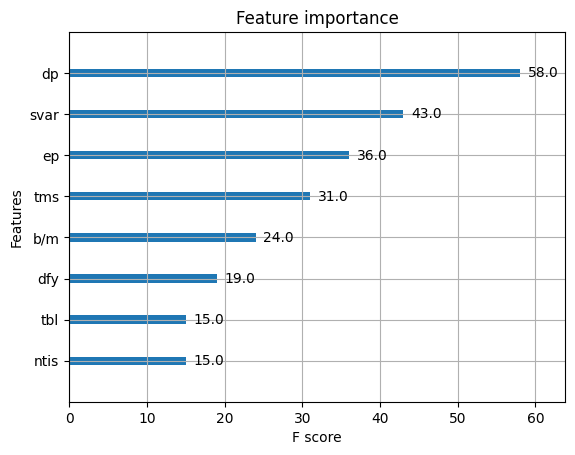

In [ ]:
# Convert dataframes to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalidation = xgb.DMatrix(X_validation, label=y_validation)
dtest = xgb.DMatrix(X_test, label=y_test)

# Parameters for XGBoost
param = {
    'objective': 'reg:squarederror',
    'tree_method': 'hist',
    'device': 'cuda',
    'learning_rate': 0.1,
    'max_depth': 5,
    'subsample': 0.7,
    'colsample_bytree': 0.8,
    'eval_metric': 'rmse'
}


# Training the model using the validation set for early stopping
evals = [(dtrain, 'train'), (dvalidation, 'validation')]
bst = xgb.train(params, dtrain, num_boost_round=500, evals=evals, early_stopping_rounds=10, verbose_eval=True)

# Predicting on the test set
y_pred = bst.predict(dtest)

# Evaluating the predictions
mse_val = mean_squared_error(y_validation.to_pandas().values, bst.predict(dvalidation))


print(f"Mean Squared Error on Validation set: {mse_val}")
r2 = r2_score(y_test.to_pandas().values, y_pred)


print(f"R-squared on Test set: {r2}")

# Plotting feature importances
xgb.plot_importance(bst)
plt.show()


In [ ]:
# Extract feature importances from the trained model
importances = bst.get_score(importance_type='weight')

# Normalize the importances
total = sum(importances.values())
normalized_importances = {k: v/total for k, v in importances.items()}

# Convert to DataFrame
importance_df = pd.DataFrame(normalized_importances, index=['XGBoost']).transpose()

# Sorting the dataframe based on importance values
importance_df = importance_df.sort_values(by='XGBoost', ascending=False)

importance_df


,XGBoost
dp,0.240664
svar,0.178423
ep,0.149378
tms,0.128631
b/m,0.099585
dfy,0.078838
ntis,0.062241
tbl,0.062241


In [ ]:
# Instantiate and train the model
rf = RandomForestRegressor(n_estimators=100, max_depth=10)
rf.fit(X_train, y_train)

# Predict on validation set and calculate MSE
y_validation_pred = rf.predict(X_validation)
mse_val = mean_squared_error(y_validation.to_pandas().values, y_validation_pred.to_pandas().values)

print(f"Validation MSE: {mse_val}")

# Predict on test set and calculate R^2
y_pred = rf.predict(X_test)
r2 = r2_score(y_test.to_pandas().values, y_pred.to_pandas().values)

print(f"Test R^2: {r2}")


importances_rf = calculate_rf_importances(rf, X_train, y_train)
normalized_importances_rf =importances_rf / np.sum(importances_rf)

# Add to the existing importance_df
importance_df['RF'] = normalized_importances_rf

# Sorting the dataframe based on importance values from the XGBoost column (or you can sort by RF if preferred)
importance_df = importance_df.sort_values(by='XGBoost', ascending=False)

importance_df


The number of bins, `n_bins` is greater than the number of samples used for training. Changing `n_bins` to number of training samples.
To use pickling first train using float32 data to fit the estimator


Validation MSE: 0.004724571153881886
Test R^2: -0.3528255759156056


,XGBoost,RF
dp,0.240664,0.085922
svar,0.178423,0.070830
ep,0.149378,0.047751
tms,0.128631,0.024015
b/m,0.099585,0.025630
dfy,0.078838,0.209795
ntis,0.062241,0.155864
tbl,0.062241,0.380194


In [ ]:
# Convert the data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train.values)
y_train_tensor = torch.FloatTensor(y_train.values).view(-1, 1)
X_validation_tensor = torch.FloatTensor(X_validation.values)
y_validation_tensor = torch.FloatTensor(y_validation.values).view(-1, 1)
X_test_tensor = torch.FloatTensor(X_test.values)
y_test_tensor = torch.FloatTensor(y_test.values).view(-1, 1)

# Define the architectures for NN1 to NN5
class NN1(nn.Module):
    def __init__(self, input_dim):
        super(NN1, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

class NN2(nn.Module):
    # More layers than NN1
    def __init__(self, input_dim):
        super(NN2, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        return self.fc4(x)

class NN3(nn.Module):
    # More layers and nodes than NN2
    def __init__(self, input_dim):
        super(NN3, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        return self.fc5(x)

class NN4(nn.Module):
    # Similar to NN3 but with dropout layers for potential regularization
    def __init__(self, input_dim):
        super(NN4, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.dropout1 = nn.Dropout(0.4)
        self.fc2 = nn.Linear(256, 128)
        self.dropout2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(128, 64)
        self.dropout3 = nn.Dropout(0.2)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = torch.relu(self.fc4(x))
        return self.fc5(x)

class NN5(nn.Module):
    # Similar to NN4 but deeper
    def __init__(self, input_dim):
        super(NN5, self).__init__()
        self.fc1 = nn.Linear(input_dim, 512)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 256)
        self.dropout2 = nn.Dropout(0.4)
        self.fc3 = nn.Linear(256, 128)
        self.dropout3 = nn.Dropout(0.3)
        self.fc4 = nn.Linear(128, 64)
        self.dropout4 = nn.Dropout(0.2)
        self.fc5 = nn.Linear(64, 32)
        self.fc6 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = torch.relu(self.fc4(x))
        x = self.dropout4(x)
        return self.fc5(x)

# Training and feature importance extraction for each NN
models = [NN1, NN2, NN3, NN4, NN5]

for idx, Model in enumerate(models, 1):
    model = Model(input_dim=X_train.shape[1])
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training the model
    for epoch in range(epochs):
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            loss.backward()
            optimizer.step()

    # Compute feature importance using connection weights
    importance = torch.mean(torch.abs(model.fc1.weight), dim=0).detach().numpy()
    normalized_importance = importance / sum(importance)

    # Append the feature importance to importance_df
    importance_df[f'NN{idx}'] = normalized_importance

importance_df



Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32, 32])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
Using a target size (torch.Size([24, 1])) that is different to the input size (torch.Size([24, 32])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


,XGBoost,RF,NN1,NN2,NN3,NN4,NN5
dp,0.240664,0.085922,0.131105,0.121814,0.123018,0.125382,0.121303
svar,0.178423,0.070830,0.119893,0.138414,0.119368,0.132467,0.121204
ep,0.149378,0.047751,0.123485,0.121758,0.128813,0.120615,0.132246
tms,0.128631,0.024015,0.134982,0.128886,0.128724,0.117427,0.128796
b/m,0.099585,0.025630,0.128637,0.114692,0.124097,0.126984,0.125303
dfy,0.078838,0.209795,0.115638,0.117153,0.118572,0.125387,0.124428
ntis,0.062241,0.155864,0.120613,0.130497,0.131082,0.126169,0.123108
tbl,0.062241,0.380194,0.125646,0.126785,0.126327,0.125569,0.123612


In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Define the path
save_path = "/content/drive/My Drive/importance_df.csv"

# Save the dataframe to CSV
importance_df.to_csv(save_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Annualy Data**

In [ ]:
# Extract year from the DATE index
temp_df = cleaned_df.copy()
temp_df['year'] = temp_df.index.year

# Group by year and permno to calculate mean for all columns
annual_data_by_permno = temp_df.groupby(['year', 'permno']).mean()

# Multiply the RET values by 12 to annualize them
annual_data_by_permno['RET'] = annual_data_by_permno['RET'] * 12

# Set the index to be a datetime format representing the year
annual_data_by_permno.reset_index(inplace=True)
annual_data_by_permno.set_index(cudf.to_datetime(annual_data_by_permno['year'].astype(str) + '-12-31'), inplace=True)
annual_data_by_permno.drop(columns='year', inplace=True)

# Remove temporary dataframe to free up memory
del temp_df



In [ ]:
annual_data_by_permno

,permno,mvel1,RET,prc,SHROUT,beta,betasq,chmom,dolvol,idiovol,...,baspread,ill,maxret,retvol,std_dolvol,std_turn,zerotrade,sic2,bm,bm_ia
year,,,,,,,,,,,,,,,,,,,,,
1987-12-31,49429,1.299710e+06,-1.437626,37.225000,30739.800000,1.279379,1.641332,-0.106468,13.126094,0.039111,...,0.033083,1.270488e-08,0.043557,0.026731,0.611992,1.087097,6.584257e-08,53.0,0.548271,-0.054160
1996-12-31,90705,5.657375e+03,2.064294,5.687500,1175.500000,1.344154,1.807001,0.518950,9.386766,0.095312,...,0.063533,6.168417e-06,0.108929,0.048880,1.382044,5.787124,5.250000e-01,36.0,0.679761,0.185714
2010-12-31,90377,2.418669e+05,0.279363,11.237500,21807.916667,1.521201,2.314584,-1.276795,14.181127,0.112439,...,0.059655,5.812256e-09,0.102295,0.044283,0.580774,22.625586,3.901725e-09,38.0,2.428755,1.626689
2003-12-31,86982,1.821515e+04,1.616856,0.788333,25102.500000,1.298808,1.733807,0.209580,6.872229,0.141564,...,0.107888,4.059138e-05,0.299369,0.102057,1.345401,0.686723,1.403509e+00,73.0,0.235364,-0.372074
2006-12-31,86789,1.330235e+06,0.129772,43.460833,30838.833333,1.281095,1.645151,0.062310,14.459882,0.031268,...,0.023709,1.508832e-09,0.040685,0.017214,0.455509,3.708184,1.451195e-08,38.0,0.385691,-0.017108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-12-31,77530,1.356038e+05,-2.703950,2.540000,42337.800000,1.406452,1.982865,-0.241138,12.005318,0.061275,...,0.109012,1.741849e-07,0.164067,0.077813,0.473379,2.168281,2.416104e-08,56.0,1.299993,0.574302
2004-12-31,15202,4.903721e+06,0.167272,48.622499,102139.000000,0.906863,0.827918,-0.082201,15.058541,0.028530,...,0.015861,5.517677e-10,0.026463,0.011704,0.396954,1.515673,2.900244e-08,14.0,0.489567,-0.588662
2010-12-31,64135,2.390435e+06,0.180410,41.474167,58182.166667,1.118545,1.251315,-0.326420,15.911768,0.061218,...,0.028663,4.631615e-10,0.040790,0.019598,0.454473,8.185223,6.383306e-09,39.0,0.356049,-1.043194


In [ ]:
# Splitting data for training, validation, and testing
train_data = annual_data_by_permno .loc['1985-12-31':'1994-12-31']
validation_data = annual_data_by_permno.loc['1995-12-31':'2001-12-31']
test_data = annual_data_by_permno .loc['2002-12-31':'2018-12-31']

# Features and target variable
X_columns = [col for col in annual_data_by_permno.columns if col not in ["permno", "RET"]]

# Training data
X_train = train_data[X_columns]
y_train = train_data["RET"]

# Validation data
X_validation = validation_data[X_columns]
y_validation = validation_data["RET"]

# Test data
X_test = test_data[X_columns]
y_test = test_data["RET"]

# Group by 'permno' and compute the mean of 'mvel1' for each stock
mean_mvel1 = test_data.groupby('permno')['mvel1'].mean()

# Sort stocks by average 'mvel1' value
sorted_permnos = mean_mvel1.sort_values(ascending=False)

# Get the permno values for the top and bottom 1000 stocks
top_1000_permnos = sorted_permnos.head(1000).index
bottom_1000_permnos = sorted_permnos.tail(1000).index

# Filter the original test data to create datasets for the top and bottom stocks
X_test_top = test_data[test_data['permno'].isin(top_1000_permnos)][X_columns]
y_test_top = test_data[test_data['permno'].isin(top_1000_permnos)]['RET']

X_test_bottom = test_data[test_data['permno'].isin(bottom_1000_permnos)][X_columns]
y_test_bottom = test_data[test_data['permno'].isin(bottom_1000_permnos)]['RET']

In [ ]:
# Convert dataframes to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalidation = xgb.DMatrix(X_validation, label=y_validation)

# Parameters for XGBoost
param = {
    'objective': 'reg:squarederror',
    'tree_method': 'hist',
    'device': 'cuda',
    'learning_rate': 0.1,
    'max_depth': 5,
    'subsample': 0.7,
    'colsample_bytree': 0.8,
    'eval_metric': 'rmse'
}


# Training the model using the validation set for early stopping
evals = [(dtrain, 'train'), (dvalidation, 'validation')]
bst = xgb.train(param, dtrain, num_boost_round=500, evals=evals, early_stopping_rounds=10, verbose_eval=True)

# Predicting on the test set
dtest_all = xgb.DMatrix(X_test, label=y_test)
dtest_top = xgb.DMatrix(X_test_top, label=y_test_top)
dtest_bottom = xgb.DMatrix(X_test_bottom, label=y_test_bottom)

y_pred_all = bst.predict(dtest_all)
r2_xgb_all = r2_score(y_test.to_pandas().values, y_pred_all)

y_pred_top = bst.predict(dtest_top)
r2_xgb_top = r2_score(y_test_top.to_pandas().values, y_pred_top)

y_pred_bottom = bst.predict(dtest_bottom)
r2_xgb_bottom = r2_score(y_test_bottom.to_pandas().values, y_pred_bottom)



[0]	train-rmse:0.83945	validation-rmse:1.52105
[1]	train-rmse:0.80459	validation-rmse:1.49301
[2]	train-rmse:0.77545	validation-rmse:1.47841
[3]	train-rmse:0.74696	validation-rmse:1.46109
[4]	train-rmse:0.72157	validation-rmse:1.44882
[5]	train-rmse:0.69608	validation-rmse:1.43514
[6]	train-rmse:0.67464	validation-rmse:1.41977
[7]	train-rmse:0.66287	validation-rmse:1.41560
[8]	train-rmse:0.65129	validation-rmse:1.41364
[9]	train-rmse:0.63431	validation-rmse:1.40556
[10]	train-rmse:0.61724	validation-rmse:1.40049
[11]	train-rmse:0.60788	validation-rmse:1.39916
[12]	train-rmse:0.59817	validation-rmse:1.39882
[13]	train-rmse:0.58714	validation-rmse:1.39114
[14]	train-rmse:0.57546	validation-rmse:1.38728
[15]	train-rmse:0.56573	validation-rmse:1.38556
[16]	train-rmse:0.55593	validation-rmse:1.38346
[17]	train-rmse:0.54751	validation-rmse:1.38110
[18]	train-rmse:0.53844	validation-rmse:1.38027
[19]	train-rmse:0.52933	validation-rmse:1.37968
[20]	train-rmse:0.51912	validation-rmse:1.37706
[2

In [ ]:
# Instantiate and train the model
rf = RandomForestRegressor(n_estimators=10, max_depth=10,min_samples_split=10,min_samples_leaf=2)
rf.fit(X_train, y_train)


# Predict on test set and calculate R^2
y_pred = rf.predict(X_test)
r2_rf_all = r2_score(y_test.to_pandas().values, y_pred.to_pandas().values)

y_pred_top = rf.predict(X_test_top)
r2_rf_top = r2_score(y_test_top.to_pandas().values, y_pred_top.to_pandas().values)

y_pred_bottom = rf.predict(X_test_bottom)
r2_rf_bottom = r2_score(y_test_bottom.to_pandas().values, y_pred_bottom.to_pandas().values)



To use pickling first train using float32 data to fit the estimator


In [ ]:
Model_nn1 = NeuralNetworks(annual_data_by_permno, input_dim=X_train.shape[1], architecture="NN1")
Model_nn1.load_data(X_train, y_train, X_validation, y_validation)
Model_nn1.train_model()

Model_nn2 = NeuralNetworks(annual_data_by_permno, input_dim=X_train.shape[1], architecture="NN2")
Model_nn2.load_data(X_train, y_train, X_validation, y_validation)
Model_nn2.train_model()

Model_nn3 = NeuralNetworks(annual_data_by_permno, input_dim=X_train.shape[1], architecture="NN5")
Model_nn3.load_data(X_train, y_train, X_validation, y_validation)
Model_nn3.train_model()

Model_nn4 = NeuralNetworks(annual_data_by_permno, input_dim=X_train.shape[1], architecture="NN5")
Model_nn4.load_data(X_train, y_train, X_validation, y_validation)
Model_nn4.train_model()

Model_nn5 = NeuralNetworks(annual_data_by_permno, input_dim=X_train.shape[1], architecture="NN5")
Model_nn5.load_data(X_train, y_train, X_validation, y_validation)
Model_nn5.train_model()

r2_nn_1 = process_number(Model_nn1.evaluate_test(X_test, y_test))
r2_nn_1_top = process_number(Model_nn1.evaluate_test(X_test_top, y_test_top))
r2_nn_1_bottom = process_number(Model_nn1.evaluate_test(X_test_bottom, y_test_bottom))

r2_nn_2 = process_number(Model_nn2.evaluate_test(X_test, y_test))
r2_nn_2_top = process_number(Model_nn2.evaluate_test(X_test_top, y_test_top))
r2_nn_2_bottom = process_number(Model_nn2.evaluate_test(X_test_bottom, y_test_bottom))

r2_nn_3 = process_number(Model_nn3.evaluate_test(X_test, y_test))
r2_nn_3_top = process_number(Model_nn3.evaluate_test(X_test_top, y_test_top))
r2_nn_3_bottom = process_number(Model_nn3.evaluate_test(X_test_bottom, y_test_bottom))

r2_nn_4 = process_number(Model_nn4.evaluate_test(X_test, y_test))
r2_nn_4_top = process_number(Model_nn4.evaluate_test(X_test_top, y_test_top))
r2_nn_4_bottom = process_number(Model_nn4.evaluate_test(X_test_bottom, y_test_bottom))

r2_nn_5 = process_number(Model_nn5.evaluate_test(X_test, y_test))
r2_nn_5_top = process_number(Model_nn5.evaluate_test(X_test_top, y_test_top))
r2_nn_5_bottom = process_number(Model_nn5.evaluate_test(X_test_bottom, y_test_bottom))


Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 0.0078, Validation Loss: 0.0085
Epoch 1, Training Loss: 0.0027, Validation Loss: 0.0081
Epoch 2, Training Loss: 0.0025, Validation Loss: 0.0079
Epoch 3, Training Loss: 0.0024, Validation Loss: 0.0079
Epoch 4, Training Loss: 0.0024, Validation Loss: 0.0076
Epoch 5, Training Loss: 0.0023, Validation Loss: 0.0077
Epoch 6, Training Loss: 0.0022, Validation Loss: 0.0075
Epoch 7, Training Loss: 0.0022, Validation Loss: 0.0074
Epoch 8, Training Loss: 0.0022, Validation Loss: 0.0073
Epoch 9, Training Loss: 0.0022, Validation Loss: 0.0076
Epoch 10, Training Loss: 0.0021, Validation Loss: 0.0072
Epoch 11, Training Loss: 0.0021, Validation Loss: 0.0071
Epoch 12, Training Loss: 0.0021, Validation Loss: 0.0070
Epoch 13, Training Loss: 0.0020, Validation Loss: 0.0070
Epoch 14, Training Loss: 0.0020, Validation Loss: 0.0071
Epoch 15, Training Loss: 0.0020, Validation Loss: 0.0071
Epoch 16, Training Loss: 0.0020, Validation Loss: 0.0072
Epoch 17, Training Loss: 0.0020, Validati

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 0.0438, Validation Loss: 0.0126
Epoch 1, Training Loss: 0.0066, Validation Loss: 0.0177
Epoch 2, Training Loss: 0.0038, Validation Loss: 0.0173
Epoch 3, Training Loss: 0.0032, Validation Loss: 0.0171
Epoch 4, Training Loss: 0.0029, Validation Loss: 0.0147
Epoch 5, Training Loss: 0.0028, Validation Loss: 0.0153
Epoch 6, Training Loss: 0.0027, Validation Loss: 0.0124
Epoch 7, Training Loss: 0.0027, Validation Loss: 0.0118
Epoch 8, Training Loss: 0.0026, Validation Loss: 0.0141
Epoch 9, Training Loss: 0.0026, Validation Loss: 0.0135
Epoch 10, Training Loss: 0.0026, Validation Loss: 0.0128
Epoch 11, Training Loss: 0.0025, Validation Loss: 0.0134
Epoch 12, Training Loss: 0.0025, Validation Loss: 0.0141
Epoch 00014: reducing learning rate of group 0 to 1.0000e-04.
Epoch 13, Training Loss: 0.0025, Validation Loss: 0.0130
Epoch 14, Training Loss: 0.0024, Validation Loss: 0.0138
Epoch 15, Training Loss: 0.0024, Validation Loss: 0.0137
Epoch 16, Training Loss: 0.0024, Val

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 0.0167, Validation Loss: 0.0084
Epoch 1, Training Loss: 0.0029, Validation Loss: 0.0084
Epoch 2, Training Loss: 0.0028, Validation Loss: 0.0083
Epoch 3, Training Loss: 0.0027, Validation Loss: 0.0083
Epoch 4, Training Loss: 0.0027, Validation Loss: 0.0085
Epoch 5, Training Loss: 0.0027, Validation Loss: 0.0085
Epoch 6, Training Loss: 0.0028, Validation Loss: 0.0083
Epoch 7, Training Loss: 0.0028, Validation Loss: 0.0083
Epoch 8, Training Loss: 0.0027, Validation Loss: 0.0083
Epoch 9, Training Loss: 0.0027, Validation Loss: 0.0083
Epoch 10, Training Loss: 0.0027, Validation Loss: 0.0083
Epoch 11, Training Loss: 0.0027, Validation Loss: 0.0083
Epoch 12, Training Loss: 0.0027, Validation Loss: 0.0085
Epoch 13, Training Loss: 0.0027, Validation Loss: 0.0083
Epoch 14, Training Loss: 0.0027, Validation Loss: 0.0082
Epoch 15, Training Loss: 0.0027, Validation Loss: 0.0082
Epoch 16, Training Loss: 0.0027, Validation Loss: 0.0082
Epoch 17, Training Loss: 0.0027, Validati

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 0.0199, Validation Loss: 0.0085
Epoch 1, Training Loss: 0.0030, Validation Loss: 0.0083
Epoch 2, Training Loss: 0.0028, Validation Loss: 0.0083
Epoch 3, Training Loss: 0.0027, Validation Loss: 0.0083
Epoch 4, Training Loss: 0.0027, Validation Loss: 0.0083
Epoch 5, Training Loss: 0.0027, Validation Loss: 0.0084
Epoch 6, Training Loss: 0.0027, Validation Loss: 0.0084
Epoch 7, Training Loss: 0.0027, Validation Loss: 0.0084
Epoch 8, Training Loss: 0.0027, Validation Loss: 0.0083
Epoch 00010: reducing learning rate of group 0 to 1.0000e-04.
Epoch 9, Training Loss: 0.0027, Validation Loss: 0.0084
Epoch 10, Training Loss: 0.0027, Validation Loss: 0.0083
Epoch 11, Training Loss: 0.0027, Validation Loss: 0.0083
Epoch 12, Training Loss: 0.0027, Validation Loss: 0.0083
Epoch 13, Training Loss: 0.0027, Validation Loss: 0.0083
Epoch 14, Training Loss: 0.0027, Validation Loss: 0.0083
Epoch 15, Training Loss: 0.0027, Validation Loss: 0.0083
Epoch 16, Training Loss: 0.0027, Val

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Training Loss: 0.0489, Validation Loss: 0.0144
Epoch 1, Training Loss: 0.0037, Validation Loss: 0.0101
Epoch 2, Training Loss: 0.0030, Validation Loss: 0.0089
Epoch 3, Training Loss: 0.0029, Validation Loss: 0.0088
Epoch 4, Training Loss: 0.0028, Validation Loss: 0.0085
Epoch 5, Training Loss: 0.0027, Validation Loss: 0.0084
Epoch 6, Training Loss: 0.0028, Validation Loss: 0.0084
Epoch 7, Training Loss: 0.0027, Validation Loss: 0.0083
Epoch 8, Training Loss: 0.0027, Validation Loss: 0.0084
Epoch 9, Training Loss: 0.0027, Validation Loss: 0.0083
Epoch 10, Training Loss: 0.0027, Validation Loss: 0.0083
Epoch 11, Training Loss: 0.0027, Validation Loss: 0.0083
Epoch 12, Training Loss: 0.0027, Validation Loss: 0.0084
Epoch 13, Training Loss: 0.0027, Validation Loss: 0.0083
Epoch 14, Training Loss: 0.0027, Validation Loss: 0.0083
Epoch 15, Training Loss: 0.0027, Validation Loss: 0.0083
Epoch 16, Training Loss: 0.0027, Validation Loss: 0.0085
Epoch 17, Training Loss: 0.0027, Validati

In [ ]:
labels = ['XGBoost+H', 'RF','NN1','NN2','NN3','NN4','NN5']
top_means = [r2_xgb_top, r2_rf_top, r2_nn_1_top, r2_nn_2_top, r2_nn_3_top, r2_nn_4_top, r2_nn_5_top]
all_means = [r2_xgb_all, r2_rf_all, r2_nn_1, r2_nn_2, r2_nn_3, r2_nn_4, r2_nn_5]
bottom_means = [r2_xgb_bottom, r2_rf_bottom, r2_nn_1_bottom, r2_nn_2_bottom, r2_nn_3_bottom, r2_nn_4_bottom, r2_nn_5_bottom]
df = pd.DataFrame({
    'Top': top_means,
    'All': all_means,
    'Bottom': bottom_means
}, index=labels)

print(df)

                Top       All    Bottom
XGBoost+H  0.524398  0.308834  0.255366
RF         0.501206  0.296547  0.249732
NN1        0.149455  0.169564  0.180699
NN2        0.604506  0.607829  0.748865
NN3        0.258661  0.179249  0.162281
NN4        0.000725  0.001380  0.001536
NN5        0.270259  0.174617  0.153686
